In [200]:
import pandas as pd
from word2number import w2n
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('/Users/apple/Desktop/Data science/UpGrad ML/Regression assignment/CarPrice_Assignment.csv')
df1=df
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df1.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [3]:
# Separate the 'Comapany name for the given detail'

def CarCompany(x):
    y=x.split(' ')
    return(y[0])
df1['CarName']=df1['CarName'].apply(CarCompany)
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dum_car=pd.get_dummies(df1['CarName'],drop_first=True)
dum_car.head(3)

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#Create dummy variables for all categorical entries

dum_fuel=pd.get_dummies(df1['fueltype'],drop_first=True)
dum_fuel.head(3)


,gas
0,1
1,1
2,1


In [6]:
dum_asp=pd.get_dummies(df1['aspiration'],drop_first=True)
dum_asp.head(3)

,turbo
0,0
1,0
2,0


In [7]:
df1['doornumber']=df1['doornumber'].apply(w2n.word_to_num)
df1['doornumber'].head(3)

0    2
1    2
2    2
Name: doornumber, dtype: int64

In [8]:
dum_carbody=pd.get_dummies(df1['carbody'],drop_first=True)
dum_carbody.head(3)

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0


In [9]:
dum_drivewheel=pd.get_dummies(df1['drivewheel'],drop_first=True)
dum_drivewheel.head(3)

,fwd,rwd
0,0,1
1,0,1
2,0,1


In [10]:
dum_engineloc=pd.get_dummies(df1['enginelocation'])
dum_engineloc.head(3)

,front,rear
0,1,0
1,1,0
2,1,0


In [11]:
dum_enginetype=pd.get_dummies(df1['enginetype'],drop_first=True)
dum_enginetype.head(3)

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0


In [12]:
df1['cylindernumber']=df1['cylindernumber'].apply(w2n.word_to_num)
df1['cylindernumber'].head(3)

0    4
1    4
2    6
Name: cylindernumber, dtype: int64

In [13]:
dum_fuelsystem=pd.get_dummies(df1['fuelsystem'],drop_first=True)
dum_fuelsystem.head(3)

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0


In [14]:
merge1=pd.concat([df1,dum_car],axis='columns')
merge1=merge1.drop('CarName',axis='columns')
merge1.head(3)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
merge2=pd.concat([merge1,dum_fuel],axis='columns')
merge2=merge2.drop('fueltype',axis='columns')
merge2.head(3)

,car_ID,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,gas
0,1,3,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,3,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,1,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
merge3=pd.concat([merge2,dum_asp],axis='columns')
merge3=merge3.drop('aspiration',axis='columns')
merge3.head(3)

,car_ID,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,gas,turbo
0,1,3,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,3,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,1,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
merge4=pd.concat([merge3,dum_carbody],axis='columns')
merge4=merge4.drop('carbody',axis='columns')
merge4.head(3)

,car_ID,symboling,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,gas,turbo,hardtop,hatchback,sedan,wagon
0,1,3,2,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,3,2,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,1,2,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [18]:
merge5=pd.concat([merge4,dum_drivewheel],axis='columns')
merge5=merge5.drop('drivewheel',axis='columns')
merge5.head(3)

,car_ID,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,3,2,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,3,2,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,3,1,2,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [19]:
merge6=pd.concat([merge5,dum_engineloc],axis='columns')
merge6=merge6.drop('enginelocation',axis='columns')
merge6.head(3)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,front,rear
0,1,3,2,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0


In [20]:
merge7=pd.concat([merge6,dum_enginetype],axis='columns')
merge7=merge7.drop('enginetype',axis='columns')
merge7.head(3)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,front,rear,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0


In [21]:
merge8=pd.concat([merge7,dum_fuelsystem],axis='columns')
merge8=merge8.drop('fuelsystem',axis='columns')

# Save the DateFrame to a new csv file
merge8.to_csv('CarsData.csv',index=False)

In [22]:
merge_mms_scaled=merge8
mms=MinMaxScaler()
var=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [23]:
merge_mms_scaled[var]=mms.fit_transform(merge_mms_scaled[var])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:
merge_mms_scaled.head(2)

# symboling,doornumber,cylindernumber need not to be scaled

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,front,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,2,0.058309,0.413433,0.316667,0.083333,0.411171,4,0.260377,0.664286,0.290476,0.125,0.2625,0.346939,0.222222,0.289474,0.207959,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,2,0.058309,0.413433,0.316667,0.083333,0.411171,4,0.260377,0.664286,0.290476,0.125,0.2625,0.346939,0.222222,0.289474,0.282558,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# From DataFrame "merge_mms_scaled":
## 1. Data(MinMaxScaled) is in decimals which will not be a suitable format for data entry(during prediction)
## 2. We shall scale the data such that data is readable. 

In [25]:
df_final=pd.read_csv('/Users/apple/CarsData.csv')
df_final.set_index=df_final['car_ID']
df_final.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,front,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Let's create a new form of scaling

In [26]:
df_final['wheelbase/10']=(df_final['wheelbase'])/10
df_final['carlength/10']=(df_final['carlength'])/10
df_final['carwidth/10']=(df_final['carwidth'])/10
df_final['carheight/10']=(df_final['carheight'])/10
df_final['curbweight/100']=(df_final['curbweight'])/100
df_final['enginesize/10']=(df_final['enginesize'])/10
df_final['horsepower/10']=(df_final['horsepower'])/10
df_final['peakrpm/100']=(df_final['peakrpm'])/100
df_final['price/1000']=(df_final['price'])/1000

df_final1=df_final
df_final.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,front,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,wheelbase/10,carlength/10,carwidth/10,carheight/10,curbweight/100,enginesize/10,horsepower/10,peakrpm/100,price/1000
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.86,16.88,6.41,4.88,25.48,13.0,11.1,50.0,13.495
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.86,16.88,6.41,4.88,25.48,13.0,11.1,50.0,16.500
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,9.45,17.12,6.55,5.24,28.23,15.2,15.4,50.0,16.500
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,9.98,17.66,6.62,5.43,23.37,10.9,10.2,55.0,13.950
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,9.94,17.66,6.64,5.43,28.24,13.6,11.5,55.0,17.450


In [27]:
df_final1=df_final1.drop(['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','horsepower','peakrpm','price'],axis='columns')
df_final1.to_csv('CarsDataScaled.csv')
df_final1.head()

,car_ID,symboling,doornumber,cylindernumber,boreratio,stroke,compressionratio,citympg,highwaympg,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,front,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,wheelbase/10,carlength/10,carwidth/10,carheight/10,curbweight/100,enginesize/10,horsepower/10,peakrpm/100,price/1000
0,1,3,2,4,3.47,2.68,9.0,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.86,16.88,6.41,4.88,25.48,13.0,11.1,50.0,13.495
1,2,3,2,4,3.47,2.68,9.0,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.86,16.88,6.41,4.88,25.48,13.0,11.1,50.0,16.500
2,3,1,2,6,2.68,3.47,9.0,19,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,9.45,17.12,6.55,5.24,28.23,15.2,15.4,50.0,16.500
3,4,2,4,4,3.19,3.40,10.0,24,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,9.98,17.66,6.62,5.43,23.37,10.9,10.2,55.0,13.950
4,5,2,4,5,3.19,3.40,8.0,18,22,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,9.94,17.66,6.64,5.43,28.24,13.6,11.5,55.0,17.450


# Let's get rid of duplicate parameters with different name 

In [30]:
df_final1['mazda']=df_final1['mazda']+df_final1['maxda']
df_final1['porsche']=df_final1['porsche']+df_final1['porcshce']
df_final1['toyota']=df_final1['toyota']+df_final1['toyouta']
df_final1['volkswagen']=df_final1['volkswagen']+df_final1['vokswagen']+df_final1['vw']
df_final1=df_final1.drop(['maxda','porcshce','toyouta','vokswagen','vw'],axis='columns')
df_final1.head()

,car_ID,symboling,doornumber,cylindernumber,boreratio,stroke,compressionratio,citympg,highwaympg,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,front,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,wheelbase/10,carlength/10,carwidth/10,carheight/10,curbweight/100,enginesize/10,horsepower/10,peakrpm/100,price/1000
0,1,3,2,4,3.47,2.68,9.0,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.86,16.88,6.41,4.88,25.48,13.0,11.1,50.0,13.495
1,2,3,2,4,3.47,2.68,9.0,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.86,16.88,6.41,4.88,25.48,13.0,11.1,50.0,16.500
2,3,1,2,6,2.68,3.47,9.0,19,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,9.45,17.12,6.55,5.24,28.23,15.2,15.4,50.0,16.500
3,4,2,4,4,3.19,3.40,10.0,24,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,9.98,17.66,6.62,5.43,23.37,10.9,10.2,55.0,13.950
4,5,2,4,5,3.19,3.40,8.0,18,22,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,9.94,17.66,6.64,5.43,28.24,13.6,11.5,55.0,17.450


# Heatmap to see if there is multicollinarity in the data

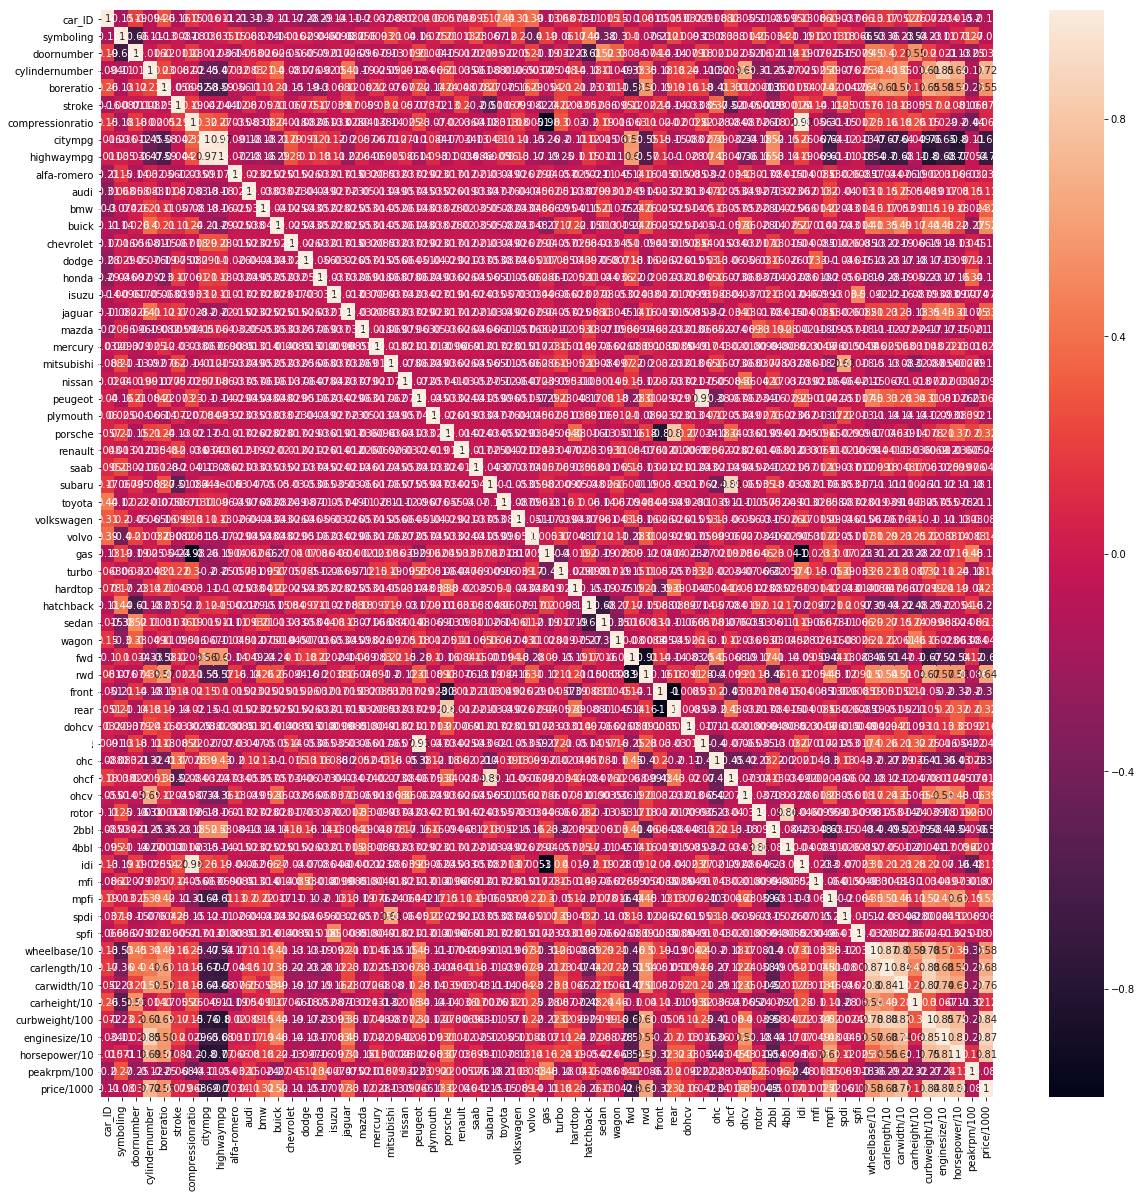

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df_final1.corr(),annot=True)

# Create test and train dataset

In [45]:
x=df_final1.drop('price/1000',axis='columns')
y=df_final1['price/1000']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
x_train_sm=sm.add_constant(x_train)

In [50]:
model=sm.OLS(y_train,x_train_sm)
model_mlr=model.fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     51.72
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.05e-48
Time:                        11:54:18   Log-Likelihood:                -242.73
No. Observations:                 143   AIC:                             599.5
Df Residuals:                      86   BIC:                             768.3
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.6542     10.926     -0.243      0.809     -24.373      19.065
car_ID              -0.0004      0.014     -0.026      0.979      -0.027       0.027
symboling           -0.0951      0.295     -0.323      0.748      -0.681       0.491
doornumber           0.1735      0.287      0.603      0.548      -0.398       0.745
cylindernumber      -1.8777      1.227     -1.530      0.130      -4.317       0.562
boreratio           -9.2968      3.494     -2.661      0.009     -16.243      -2.350
stroke              -2.8348      1.610     -1.761      0.082      -6.035       0.366
compressionratio    -0.9853      0.574     -1.717      0.090      -2.126       0.155
citympg              0.0768      0.158      0.485      0.629      -0.238       0.391
highwaympg           0.0830      0.145      0.571      0.569      -0.206       0.372
alfa-romero          1.2122      2.923      0.415      0.679      -4.599       7.023
audi                 0.2648      2.323      0.114      0.910      -4.354       4.883
bmw                  9.0677      2.199      4.123      0.000       4.695      13.440
buick                1.9775      2.071      0.955      0.342      -2.140       6.095
chevrolet           -3.3429      2.188     -1.528      0.130      -7.693       1.007
dodge               -4.2904      1.999     -2.146      0.035      -8.264      -0.316
honda               -2.5578      2.464     -1.038      0.302      -7.457       2.341
isuzu               -1.1450      1.812     -0.632      0.529      -4.747       2.457
jaguar              -0.7241      2.916     -0.248      0.804      -6.522       5.073
mazda               -0.1119      0.710     -0.158      0.875      -1.524       1.300
mercury          -1.421e-14   2.08e-14     -0.684      0.496   -5.55e-14    2.71e-14
mitsubishi          -4.9907      1.417     -3.523      0.001      -7.807      -2.175
nissan              -0.6068      1.022     -0.594      0.554      -2.638       1.424
peugeot             -9.3038      2.969     -3.133      0.002     -15.207      -3.401
plymouth            -4.2161      1.497     -2.817      0.006      -7.192      -1.241
porsche              7.3626      2.384      3.088      0.003       2.623      12.103
renault             -1.2188      1.803     -0.676      0.501      -4.804       2.366
saab                 6.8471      1.713      3.998      0.000       3.443      10.252
subaru              -0.2522      2.355     -0.107      0.915      -4.934       4.430
toyota              -0.1872      0.860     -0.218      0.828      -1.897       1.523
volkswagen           0.0643      0.711      0.090      0.928      -1.348       1.477
volvo                1.3493      1.854      0.728      0.469      -2.336       5.034
gas                 -7.3672      6.881     -1.071      0.287     -21.046       6.312
turbo                2.

In [48]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
39,front,inf
40,rear,inf
27,subaru,inf
31,gas,inf
44,ohcf,inf
49,idi,inf
59,enginesize/10,244.150000
6,compressionratio,232.030000
3,cylindernumber,98.830000
51,mpfi,66.630000


# 1.Drop: subaru(0.915(p val.),inf(vif))

In [51]:
x_train1=x_train_sm.drop('subaru',axis='columns')
model1=sm.OLS(y_train,x_train1)
model_mlr_1=model1.fit()
model_mlr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     51.72
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.05e-48
Time:                        11:58:08   Log-Likelihood:                -242.73
No. Observations:                 143   AIC:                             599.5
Df Residuals:                      86   BIC:                             768.3
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.5912     11.415     -0.227      0.821     -25.284      20.101
car_ID              -0.0004      0.014     -0.026      0.979      -0.027       0.027
symboling           -0.0951      0.295     -0.323      0.748      -0.681       0.491
doornumber           0.1735      0.287      0.603      0.548      -0.398       0.745
cylindernumber      -1.8777      1.227     -1.530      0.130      -4.317       0.562
boreratio           -9.2968      3.494     -2.661      0.009     -16.243      -2.350
stroke              -2.8348      1.610     -1.761      0.082      -6.035       0.366
compressionratio    -0.9853      0.574     -1.717      0.090      -2.126       0.155
citympg              0.0768      0.158      0.485      0.629      -0.238       0.391
highwaympg           0.0830      0.145      0.571      0.569      -0.206       0.372
alfa-romero          1.2122      2.923      0.415      0.679      -4.599       7.023
audi                 0.2648      2.323      0.114      0.910      -4.354       4.883
bmw                  9.0677      2.199      4.123      0.000       4.695      13.440
buick                1.9775      2.071      0.955      0.342      -2.140       6.095
chevrolet           -3.3429      2.188     -1.528      0.130      -7.693       1.007
dodge               -4.2904      1.999     -2.146      0.035      -8.264      -0.316
honda               -2.5578      2.464     -1.038      0.302      -7.457       2.341
isuzu               -1.1450      1.812     -0.632      0.529      -4.747       2.457
jaguar              -0.7241      2.916     -0.248      0.804      -6.522       5.073
mazda               -0.1119      0.710     -0.158      0.875      -1.524       1.300
mercury          -8.073e-15   2.41e-14     -0.335      0.738    -5.6e-14    3.98e-14
mitsubishi          -4.9907      1.417     -3.523      0.001      -7.807      -2.175
nissan              -0.6068      1.022     -0.594      0.554      -2.638       1.424
peugeot             -9.3038      2.969     -3.133      0.002     -15.207      -3.401
plymouth            -4.2161      1.497     -2.817      0.006      -7.192      -1.241
porsche              7.3626      2.384      3.088      0.003       2.623      12.103
renault             -1.2188      1.803     -0.676      0.501      -4.804       2.366
saab                 6.8471      1.713      3.998      0.000       3.443      10.252
toyota              -0.1872      0.860     -0.218      0.828      -1.897       1.523
volkswagen           0.0643      0.711      0.090      0.928      -1.348       1.477
volvo                1.3493      1.854      0.728      0.469      -2.336       5.034
gas                 -7.3357      7.066     -1.038      0.302     -21.382       6.710
turbo                2.9418      1.112      2.646      0.010       0.732       5.152
hardtop             -4.

In [52]:
vif1=pd.DataFrame()
vif1['Features']=x_train1.columns
vif1['VIF']=[variance_inflation_factor(x_train1.values,i) for i in range (x_train1.shape[1])]
vif1['VIF']=round(vif1['VIF'],2)
vif1=vif1.sort_values(by='VIF',ascending=False)
vif1

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
49,idi,inf
40,rear,inf
39,front,inf
31,gas,inf
59,enginesize/10,244.150000
7,compressionratio,232.030000
4,cylindernumber,98.830000
51,mpfi,66.630000
60,horsepower/10,58.230000
8,citympg,55.060000


# 2.Drop car_ID(0.97(p val.),31.5(vif))

In [53]:
x_train2=x_train1.drop('car_ID',axis='columns')
model2=sm.OLS(y_train,x_train2)
model_mlr_2=model2.fit()
model_mlr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     53.27
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.87e-49
Time:                        12:02:52   Log-Likelihood:                -242.73
No. Observations:                 143   AIC:                             597.5
Df Residuals:                      87   BIC:                             763.4
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.6277     11.262     -0.233      0.816     -25.013      19.758
symboling           -0.0947      0.293     -0.323      0.747      -0.676       0.487
doornumber           0.1731      0.285      0.606      0.546      -0.394       0.740
cylindernumber      -1.8713      1.195     -1.565      0.121      -4.248       0.505
boreratio           -9.2763      3.384     -2.742      0.007     -16.001      -2.551
stroke              -2.8283      1.581     -1.789      0.077      -5.971       0.314
compressionratio    -0.9885      0.557     -1.775      0.079      -2.095       0.118
citympg              0.0768      0.157      0.488      0.627      -0.236       0.389
highwaympg           0.0835      0.143      0.585      0.560      -0.200       0.367
alfa-romero          1.2638      2.128      0.594      0.554      -2.965       5.493
audi                 0.3127      1.397      0.224      0.823      -2.464       3.089
bmw                  9.1088      1.509      6.036      0.000       6.109      12.108
buick                1.9998      1.872      1.068      0.288      -1.722       5.721
chevrolet           -3.3081      1.716     -1.927      0.057      -6.719       0.103
dodge               -4.2532      1.379     -3.085      0.003      -6.994      -1.513
honda               -2.5301      2.208     -1.146      0.255      -6.918       1.858
isuzu               -1.1201      1.526     -0.734      0.465      -4.152       1.912
jaguar              -0.6883      2.552     -0.270      0.788      -5.761       4.385
mazda               -0.0992      0.510     -0.195      0.846      -1.112       0.914
mercury           7.746e-15   2.58e-14      0.301      0.764   -4.34e-14    5.89e-14
mitsubishi          -4.9767      1.302     -3.823      0.000      -7.564      -2.389
nissan              -0.5981      0.959     -0.624      0.534      -2.504       1.307
peugeot             -9.2999      2.948     -3.154      0.002     -15.160      -3.440
plymouth            -4.2142      1.486     -2.835      0.006      -7.168      -1.260
porsche              7.3676      2.363      3.118      0.002       2.671      12.064
renault             -1.2170      1.792     -0.679      0.499      -4.778       2.344
saab                 6.8482      1.702      4.023      0.000       3.465      10.232
toyota              -0.1971      0.764     -0.258      0.797      -1.717       1.322
volkswagen           0.0551      0.613      0.090      0.929      -1.164       1.274
volvo                1.3256      1.601      0.828      0.410      -1.856       4.507
gas                 -7.3719      6.885     -1.071      0.287     -21.057       6.313
turbo                2.9382      1.097      2.679      0.009       0.758       5.118
hardtop             -4.2021      2.244     -1.873      0.064      -8.662       0.258
hatchback           -4.

In [54]:
vif2=pd.DataFrame()
vif2['Features']=x_train2.columns
vif2['VIF']=[variance_inflation_factor(x_train2.values,i) for i in range (x_train2.shape[1])]
vif2['VIF']=round(vif2['VIF'],2)
vif2=vif2.sort_values(by='VIF',ascending=False)
vif2

,Features,VIF
30,gas,inf
38,front,inf
39,rear,inf
48,idi,inf
58,enginesize/10,235.440000
6,compressionratio,221.090000
3,cylindernumber,94.890000
50,mpfi,64.670000
59,horsepower/10,57.830000
7,citympg,55.030000


# 3.Drop rear(0.535(p val.),inf(vif))

In [55]:
x_train3=x_train2.drop('rear',axis='columns')
model3=sm.OLS(y_train,x_train3)
model_mlr_3=model3.fit()
model_mlr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     53.27
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.87e-49
Time:                        12:09:40   Log-Likelihood:                -242.73
No. Observations:                 143   AIC:                             597.5
Df Residuals:                      87   BIC:                             763.4
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3276     14.795     -0.022      0.982     -29.734      29.079
symboling           -0.0947      0.293     -0.323      0.747      -0.676       0.487
doornumber           0.1731      0.285      0.606      0.546      -0.394       0.740
cylindernumber      -1.8713      1.195     -1.565      0.121      -4.248       0.505
boreratio           -9.2763      3.384     -2.742      0.007     -16.001      -2.551
stroke              -2.8283      1.581     -1.789      0.077      -5.971       0.314
compressionratio    -0.9885      0.557     -1.775      0.079      -2.095       0.118
citympg              0.0768      0.157      0.488      0.627      -0.236       0.389
highwaympg           0.0835      0.143      0.585      0.560      -0.200       0.367
alfa-romero          1.2638      2.128      0.594      0.554      -2.965       5.493
audi                 0.3127      1.397      0.224      0.823      -2.464       3.089
bmw                  9.1088      1.509      6.036      0.000       6.109      12.108
buick                1.9998      1.872      1.068      0.288      -1.722       5.721
chevrolet           -3.3081      1.716     -1.927      0.057      -6.719       0.103
dodge               -4.2532      1.379     -3.085      0.003      -6.994      -1.513
honda               -2.5301      2.208     -1.146      0.255      -6.918       1.858
isuzu               -1.1201      1.526     -0.734      0.465      -4.152       1.912
jaguar              -0.6883      2.552     -0.270      0.788      -5.761       4.385
mazda               -0.0992      0.510     -0.195      0.846      -1.112       0.914
mercury          -9.215e-16   4.87e-14     -0.019      0.985   -9.78e-14    9.59e-14
mitsubishi          -4.9767      1.302     -3.823      0.000      -7.564      -2.389
nissan              -0.5981      0.959     -0.624      0.534      -2.504       1.307
peugeot             -9.2999      2.948     -3.154      0.002     -15.160      -3.440
plymouth            -4.2142      1.486     -2.835      0.006      -7.168      -1.260
porsche              7.3676      2.363      3.118      0.002       2.671      12.064
renault             -1.2170      1.792     -0.679      0.499      -4.778       2.344
saab                 6.8482      1.702      4.023      0.000       3.465      10.232
toyota              -0.1971      0.764     -0.258      0.797      -1.717       1.322
volkswagen           0.0551      0.613      0.090      0.929      -1.164       1.274
volvo                1.3256      1.601      0.828      0.410      -1.856       4.507
gas                 -6.2219      8.381     -0.742      0.460     -22.880      10.436
turbo                2.9382      1.097      2.679      0.009       0.758       5.118
hardtop             -4.2021      2.244     -1.873      0.064      -8.662       0.258
hatchback           -4.

In [56]:
vif3=pd.DataFrame()
vif3['Features']=x_train3.columns
vif3['VIF']=[variance_inflation_factor(x_train3.values,i) for i in range (x_train3.shape[1])]
vif3['VIF']=round(vif3['VIF'],2)
vif3=vif3.sort_values(by='VIF',ascending=False)
vif3

,Features,VIF
47,idi,inf
30,gas,inf
57,enginesize/10,235.440000
6,compressionratio,221.090000
3,cylindernumber,94.890000
49,mpfi,64.670000
58,horsepower/10,57.830000
7,citympg,55.030000
56,curbweight/100,54.140000
45,2bbl,50.250000


# 4.Drop 'mercury'(0.985(p val.),NaN(vif))

In [57]:
x_train4=x_train3.drop('mercury',axis='columns')
model4=sm.OLS(y_train,x_train4)
model_mlr_4=model4.fit()
model_mlr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     53.27
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.87e-49
Time:                        12:13:12   Log-Likelihood:                -242.73
No. Observations:                 143   AIC:                             597.5
Df Residuals:                      87   BIC:                             763.4
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3276     14.795     -0.022      0.982     -29.734      29.079
symboling           -0.0947      0.293     -0.323      0.747      -0.676       0.487
doornumber           0.1731      0.285      0.606      0.546      -0.394       0.740
cylindernumber      -1.8713      1.195     -1.565      0.121      -4.248       0.505
boreratio           -9.2763      3.384     -2.742      0.007     -16.001      -2.551
stroke              -2.8283      1.581     -1.789      0.077      -5.971       0.314
compressionratio    -0.9885      0.557     -1.775      0.079      -2.095       0.118
citympg              0.0768      0.157      0.488      0.627      -0.236       0.389
highwaympg           0.0835      0.143      0.585      0.560      -0.200       0.367
alfa-romero          1.2638      2.128      0.594      0.554      -2.965       5.493
audi                 0.3127      1.397      0.224      0.823      -2.464       3.089
bmw                  9.1088      1.509      6.036      0.000       6.109      12.108
buick                1.9998      1.872      1.068      0.288      -1.722       5.721
chevrolet           -3.3081      1.716     -1.927      0.057      -6.719       0.103
dodge               -4.2532      1.379     -3.085      0.003      -6.994      -1.513
honda               -2.5301      2.208     -1.146      0.255      -6.918       1.858
isuzu               -1.1201      1.526     -0.734      0.465      -4.152       1.912
jaguar              -0.6883      2.552     -0.270      0.788      -5.761       4.385
mazda               -0.0992      0.510     -0.195      0.846      -1.112       0.914
mitsubishi          -4.9767      1.302     -3.823      0.000      -7.564      -2.389
nissan              -0.5981      0.959     -0.624      0.534      -2.504       1.307
peugeot             -9.2999      2.948     -3.154      0.002     -15.160      -3.440
plymouth            -4.2142      1.486     -2.835      0.006      -7.168      -1.260
porsche              7.3676      2.363      3.118      0.002       2.671      12.064
renault             -1.2170      1.792     -0.679      0.499      -4.778       2.344
saab                 6.8482      1.702      4.023      0.000       3.465      10.232
toyota              -0.1971      0.764     -0.258      0.797      -1.717       1.322
volkswagen           0.0551      0.613      0.090      0.929      -1.164       1.274
volvo                1.3256      1.601      0.828      0.410      -1.856       4.507
gas                 -6.2219      8.381     -0.742      0.460     -22.880      10.436
turbo                2.9382      1.097      2.679      0.009       0.758       5.118
hardtop             -4.2021      2.244     -1.873      0.064      -8.662       0.258
hatchback           -4.7673      1.717     -2.777      0.007      -8.179      -1.356
sedan               -4.

In [58]:
vif4=pd.DataFrame()
vif4['Features']=x_train4.columns
vif4['VIF']=[variance_inflation_factor(x_train4.values,i) for i in range (x_train4.shape[1])]
vif4['VIF']=round(vif4['VIF'],2)
vif4=vif4.sort_values(by='VIF',ascending=False)
vif4

,Features,VIF
46,idi,inf
29,gas,inf
56,enginesize/10,235.440000
6,compressionratio,221.090000
3,cylindernumber,94.890000
48,mpfi,64.670000
57,horsepower/10,57.830000
7,citympg,55.030000
55,curbweight/100,54.140000
44,2bbl,50.250000


# 6. Drop 'volkswagen'(0.929(p val.),2.91(vif))

In [59]:
x_train5=x_train4.drop('volkswagen',axis='columns')
model5=sm.OLS(y_train,x_train5)
model_mlr_5=model5.fit()
model_mlr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     54.88
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.23e-50
Time:                        12:19:38   Log-Likelihood:                -242.74
No. Observations:                 143   AIC:                             595.5
Df Residuals:                      88   BIC:                             758.4
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1868     14.628     -0.013      0.990     -29.258      28.884
symboling           -0.0889      0.284     -0.313      0.755      -0.653       0.475
doornumber           0.1750      0.283      0.618      0.538      -0.388       0.738
cylindernumber      -1.8727      1.189     -1.575      0.119      -4.235       0.490
boreratio           -9.3019      3.353     -2.775      0.007     -15.964      -2.640
stroke              -2.8034      1.548     -1.811      0.074      -5.879       0.272
compressionratio    -0.9836      0.551     -1.785      0.078      -2.079       0.112
citympg              0.0768      0.156      0.491      0.625      -0.234       0.388
highwaympg           0.0827      0.142      0.583      0.561      -0.199       0.364
alfa-romero          1.2091      2.027      0.596      0.552      -2.820       5.238
audi                 0.2590      1.256      0.206      0.837      -2.237       2.755
bmw                  9.0776      1.460      6.216      0.000       6.176      11.980
buick                1.9781      1.846      1.071      0.287      -1.691       5.647
chevrolet           -3.3441      1.659     -2.015      0.047      -6.642      -0.046
dodge               -4.3047      1.247     -3.453      0.001      -6.783      -1.827
honda               -2.5789      2.128     -1.212      0.229      -6.808       1.650
isuzu               -1.1512      1.477     -0.779      0.438      -4.087       1.785
jaguar              -0.7150      2.521     -0.284      0.777      -5.724       4.295
mazda               -0.1126      0.485     -0.232      0.817      -1.075       0.850
mitsubishi          -5.0176      1.213     -4.136      0.000      -7.428      -2.607
nissan              -0.6351      0.861     -0.738      0.463      -2.346       1.076
peugeot             -9.3142      2.927     -3.182      0.002     -15.132      -3.496
plymouth            -4.2595      1.390     -3.064      0.003      -7.022      -1.497
porsche              7.3442      2.335      3.145      0.002       2.704      11.985
renault             -1.2653      1.700     -0.744      0.459      -4.643       2.112
saab                 6.8037      1.620      4.200      0.000       3.585      10.023
toyota              -0.2180      0.724     -0.301      0.764      -1.657       1.221
volvo                1.3062      1.577      0.828      0.410      -1.828       4.441
gas                 -6.1285      8.269     -0.741      0.461     -22.562      10.305
turbo                2.9386      1.091      2.695      0.008       0.771       5.106
hardtop             -4.2721      2.093     -2.041      0.044      -8.431      -0.113
hatchback           -4.8240      1.587     -3.039      0.003      -7.978      -1.670
sedan               -4.0958      1.695     -2.416      0.018      -7.465      -0.727
wagon               -3.

In [60]:
vif5=pd.DataFrame()
vif5['Features']=x_train5.columns
vif5['VIF']=[variance_inflation_factor(x_train5.values,i) for i in range (x_train5.shape[1])]
vif5['VIF']=round(vif5['VIF'],2)
vif5=vif5.sort_values(by='VIF',ascending=False)
vif5

,Features,VIF
28,gas,inf
45,idi,inf
55,enginesize/10,235.430000
6,compressionratio,218.960000
3,cylindernumber,94.880000
47,mpfi,64.460000
56,horsepower/10,57.230000
7,citympg,55.030000
54,curbweight/100,54.140000
43,2bbl,50.250000


# 7. Drop 'ohcv' (0.924(p val.),6.370000(vif)):

In [61]:
x_train6=x_train5.drop('ohcv',axis='columns')
model6=sm.OLS(y_train,x_train6)
model_mlr_6=model6.fit()
model_mlr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     56.54
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.22e-50
Time:                        12:24:54   Log-Likelihood:                -242.75
No. Observations:                 143   AIC:                             593.5
Df Residuals:                      89   BIC:                             753.5
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1977     14.546     -0.014      0.989     -29.101      28.706
symboling           -0.0842      0.278     -0.303      0.763      -0.637       0.468
doornumber           0.1761      0.281      0.626      0.533      -0.383       0.735
cylindernumber      -1.8960      1.156     -1.640      0.105      -4.194       0.402
boreratio           -9.3180      3.330     -2.799      0.006     -15.934      -2.702
stroke              -2.7796      1.519     -1.830      0.071      -5.798       0.238
compressionratio    -0.9719      0.534     -1.819      0.072      -2.033       0.090
citympg              0.0790      0.154      0.514      0.609      -0.227       0.385
highwaympg           0.0814      0.140      0.580      0.563      -0.197       0.360
alfa-romero          1.2024      2.015      0.597      0.552      -2.801       5.206
audi                 0.2878      1.212      0.237      0.813      -2.121       2.696
bmw                  9.1100      1.412      6.451      0.000       6.304      11.916
buick                1.9925      1.830      1.089      0.279      -1.643       5.628
chevrolet           -3.3551      1.646     -2.038      0.045      -6.626      -0.084
dodge               -4.3041      1.240     -3.471      0.001      -6.768      -1.841
honda               -2.5925      2.111     -1.228      0.223      -6.787       1.602
isuzu               -1.1618      1.465     -0.793      0.430      -4.072       1.749
jaguar              -0.6492      2.410     -0.269      0.788      -5.439       4.140
mazda               -0.1066      0.478     -0.223      0.824      -1.056       0.843
mitsubishi          -5.0200      1.206     -4.162      0.000      -7.416      -2.624
nissan              -0.6511      0.840     -0.775      0.440      -2.319       1.017
peugeot             -9.2960      2.905     -3.200      0.002     -15.068      -3.524
plymouth            -4.2661      1.381     -3.090      0.003      -7.010      -1.523
porsche              7.3723      2.303      3.201      0.002       2.796      11.949
renault             -1.2463      1.678     -0.743      0.460      -4.581       2.089
saab                 6.8109      1.609      4.233      0.000       3.614      10.008
toyota              -0.1973      0.687     -0.287      0.775      -1.561       1.167
volvo                1.2975      1.566      0.829      0.410      -1.814       4.409
gas                 -6.0501      8.182     -0.739      0.462     -22.308      10.207
turbo                2.9493      1.079      2.734      0.008       0.806       5.093
hardtop             -4.3402      1.955     -2.220      0.029      -8.225      -0.455
hatchback           -4.8816      1.459     -3.346      0.001      -7.781      -1.983
sedan               -4.1499      1.588     -2.613      0.011      -7.306      -0.994
wagon               -3.

In [62]:
vif6=pd.DataFrame()
vif6['Features']=x_train6.columns
vif6['VIF']=[variance_inflation_factor(x_train6.values,i) for i in range (x_train6.shape[1])]
vif6['VIF']=round(vif6['VIF'],2)
vif6=vif6.sort_values(by='VIF',ascending=False)
vif6

,Features,VIF
44,idi,inf
28,gas,inf
54,enginesize/10,235.160000
6,compressionratio,208.090000
3,cylindernumber,90.820000
46,mpfi,63.700000
55,horsepower/10,54.430000
7,citympg,53.790000
53,curbweight/100,53.650000
42,2bbl,50.110000


# 8.Drop 'mpfi' (0.888(p val.),63.7(vif)):

In [63]:
x_train7=x_train6.drop('mpfi',axis='columns')
model7=sm.OLS(y_train,x_train7)
model_mlr_7=model7.fit()
model_mlr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     58.26
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.61e-51
Time:                        12:28:37   Log-Likelihood:                -242.76
No. Observations:                 143   AIC:                             591.5
Df Residuals:                      90   BIC:                             748.6
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4432     14.363     -0.031      0.975     -28.977      28.090
symboling           -0.0875      0.276     -0.318      0.752      -0.635       0.460
doornumber           0.1857      0.271      0.684      0.495      -0.353       0.725
cylindernumber      -1.9004      1.150     -1.653      0.102      -4.184       0.384
boreratio           -9.3507      3.303     -2.831      0.006     -15.913      -2.788
stroke              -2.7996      1.504     -1.861      0.066      -5.788       0.188
compressionratio    -0.9709      0.531     -1.827      0.071      -2.026       0.085
citympg              0.0812      0.152      0.534      0.595      -0.221       0.384
highwaympg           0.0812      0.140      0.582      0.562      -0.196       0.358
alfa-romero          1.2105      2.003      0.604      0.547      -2.769       5.190
audi                 0.3092      1.196      0.259      0.797      -2.067       2.685
bmw                  9.0902      1.397      6.505      0.000       6.314      11.866
buick                1.9693      1.812      1.087      0.280      -1.631       5.570
chevrolet           -3.3556      1.637     -2.050      0.043      -6.608      -0.103
dodge               -4.2978      1.232     -3.488      0.001      -6.746      -1.850
honda               -2.3364      1.063     -2.197      0.031      -4.449      -0.224
isuzu               -1.1559      1.456     -0.794      0.429      -4.049       1.737
jaguar              -0.6671      2.394     -0.279      0.781      -5.423       4.089
mazda               -0.1018      0.474     -0.215      0.830      -1.043       0.840
mitsubishi          -4.9924      1.183     -4.219      0.000      -7.344      -2.641
nissan              -0.6409      0.832     -0.770      0.443      -2.294       1.012
peugeot             -9.2847      2.888     -3.215      0.002     -15.022      -3.547
plymouth            -4.2575      1.372     -3.103      0.003      -6.983      -1.532
porsche              7.3927      2.286      3.234      0.002       2.851      11.935
renault             -1.2486      1.669     -0.748      0.456      -4.565       2.067
saab                 6.8268      1.596      4.277      0.000       3.656       9.998
toyota              -0.1973      0.683     -0.289      0.773      -1.554       1.159
volvo                1.2639      1.539      0.821      0.414      -1.794       4.321
gas                 -6.2980      7.947     -0.793      0.430     -22.085       9.489
turbo                2.9906      1.032      2.897      0.005       0.939       5.042
hardtop             -4.3388      1.945     -2.231      0.028      -8.202      -0.476
hatchback           -4.8701      1.449     -3.361      0.001      -7.748      -1.992
sedan               -4.1669      1.575     -2.646      0.010      -7.296      -1.038
wagon               -3.

In [64]:
vif7=pd.DataFrame()
vif7['Features']=x_train7.columns
vif7['VIF']=[variance_inflation_factor(x_train7.values,i) for i in range (x_train7.shape[1])]
vif7['VIF']=round(vif7['VIF'],2)
vif7=vif7.sort_values(by='VIF',ascending=False)
vif7

,Features,VIF
44,idi,inf
28,gas,inf
53,enginesize/10,225.000000
6,compressionratio,208.050000
3,cylindernumber,90.750000
52,curbweight/100,53.290000
7,citympg,53.250000
54,horsepower/10,50.500000
8,highwaympg,48.470000
4,boreratio,38.040000


# 9.Drop 'spdi'(0.937(p val.),3.3(vif)):

In [65]:
x_train8=x_train7.drop('spdi',axis='columns')
model8=sm.OLS(y_train,x_train8)
model_mlr_8=model8.fit()
model_mlr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     60.06
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.06e-52
Time:                        13:13:58   Log-Likelihood:                -242.77
No. Observations:                 143   AIC:                             589.5
Df Residuals:                      91   BIC:                             743.6
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5044     14.263     -0.035      0.972     -28.836      27.828
symboling           -0.0895      0.273     -0.328      0.744      -0.632       0.453
doornumber           0.1869      0.269      0.693      0.490      -0.348       0.722
cylindernumber      -1.9081      1.139     -1.675      0.097      -4.171       0.355
boreratio           -9.3636      3.281     -2.854      0.005     -15.881      -2.846
stroke              -2.8009      1.496     -1.873      0.064      -5.772       0.170
compressionratio    -0.9634      0.520     -1.853      0.067      -1.996       0.070
citympg              0.0816      0.151      0.540      0.591      -0.219       0.382
highwaympg           0.0810      0.139      0.584      0.561      -0.195       0.357
alfa-romero          1.1941      1.981      0.603      0.548      -2.741       5.130
audi                 0.3221      1.178      0.273      0.785      -2.019       2.663
bmw                  9.0942      1.389      6.548      0.000       6.335      11.853
buick                1.9715      1.802      1.094      0.277      -1.608       5.551
chevrolet           -3.3716      1.616     -2.087      0.040      -6.581      -0.162
dodge               -4.2961      1.225     -3.506      0.001      -6.730      -1.862
honda               -2.3380      1.057     -2.211      0.030      -4.438      -0.238
isuzu               -1.1702      1.437     -0.814      0.418      -4.025       1.685
jaguar              -0.6742      2.379     -0.283      0.778      -5.400       4.052
mazda               -0.1060      0.468     -0.226      0.821      -1.036       0.824
mitsubishi          -5.0325      1.064     -4.730      0.000      -7.146      -2.919
nissan              -0.6459      0.825     -0.783      0.436      -2.285       0.993
peugeot             -9.2764      2.870     -3.232      0.002     -14.978      -3.575
plymouth            -4.2829      1.327     -3.229      0.002      -6.918      -1.648
porsche              7.3815      2.269      3.253      0.002       2.874      11.889
renault             -1.2365      1.653     -0.748      0.456      -4.520       2.047
saab                 6.8343      1.585      4.313      0.000       3.687       9.982
toyota              -0.2046      0.673     -0.304      0.762      -1.541       1.132
volvo                1.2623      1.530      0.825      0.412      -1.778       4.302
gas                 -6.2849      7.901     -0.795      0.428     -21.980       9.410
turbo                2.9694      0.992      2.994      0.004       0.999       4.940
hardtop             -4.3444      1.933     -2.248      0.027      -8.183      -0.506
hatchback           -4.8790      1.437     -3.396      0.001      -7.733      -2.026
sedan               -4.1730      1.565     -2.667      0.009      -7.281      -1.065
wagon               -3.

In [66]:
vif8=pd.DataFrame()
vif8['Features']=x_train8.columns
vif8['VIF']=[variance_inflation_factor(x_train8.values,i) for i in range (x_train8.shape[1])]
vif8['VIF']=round(vif8['VIF'],2)
vif8=vif8.sort_values(by='VIF',ascending=False)
vif8

,Features,VIF
44,idi,inf
28,gas,inf
52,enginesize/10,224.950000
6,compressionratio,201.510000
3,cylindernumber,90.100000
51,curbweight/100,53.200000
7,citympg,53.180000
53,horsepower/10,49.660000
8,highwaympg,48.450000
4,boreratio,37.950000


# 10.Drop 'mazda' (0.821(p val.),2.16(vif)):

In [67]:
x_train9=x_train8.drop('mazda',axis='columns')
model9=sm.OLS(y_train,x_train9)
model_mlr_9=model9.fit()
model_mlr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     61.90
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.66e-53
Time:                        13:17:38   Log-Likelihood:                -242.81
No. Observations:                 143   AIC:                             587.6
Df Residuals:                      92   BIC:                             738.7
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8212     14.121     -0.058      0.954     -28.867      27.224
symboling           -0.0757      0.265     -0.286      0.776      -0.601       0.450
doornumber           0.1897      0.268      0.709      0.480      -0.342       0.722
cylindernumber      -1.9069      1.133     -1.682      0.096      -4.158       0.344
boreratio           -9.3777      3.264     -2.873      0.005     -15.860      -2.896
stroke              -2.7860      1.487     -1.874      0.064      -5.738       0.166
compressionratio    -0.9459      0.512     -1.849      0.068      -1.962       0.070
citympg              0.0775      0.149      0.519      0.605      -0.219       0.374
highwaympg           0.0865      0.136      0.636      0.526      -0.184       0.356
alfa-romero          1.2801      1.934      0.662      0.510      -2.562       5.122
audi                 0.3607      1.160      0.311      0.757      -1.943       2.664
bmw                  9.1446      1.364      6.705      0.000       6.436      11.853
buick                2.0532      1.756      1.169      0.245      -1.435       5.542
chevrolet           -3.2917      1.569     -2.099      0.039      -6.407      -0.176
dodge               -4.2248      1.178     -3.586      0.001      -6.565      -1.885
honda               -2.2787      1.019     -2.236      0.028      -4.303      -0.255
isuzu               -1.0855      1.381     -0.786      0.434      -3.827       1.656
jaguar              -0.6410      2.362     -0.271      0.787      -5.333       4.051
mitsubishi          -4.9760      1.029     -4.836      0.000      -7.020      -2.932
nissan              -0.5683      0.746     -0.761      0.448      -2.051       0.914
peugeot             -9.2046      2.838     -3.243      0.002     -14.841      -3.568
plymouth            -4.2235      1.294     -3.265      0.002      -6.793      -1.654
porsche              7.4468      2.239      3.325      0.001       2.999      11.894
renault             -1.1921      1.633     -0.730      0.467      -4.435       2.051
saab                 6.8528      1.574      4.353      0.000       3.726       9.980
toyota              -0.1383      0.603     -0.229      0.819      -1.336       1.059
volvo                1.3343      1.489      0.896      0.373      -1.624       4.292
gas                 -6.3093      7.860     -0.803      0.424     -21.919       9.301
turbo                2.9922      0.982      3.048      0.003       1.043       4.942
hardtop             -4.3871      1.913     -2.293      0.024      -8.187      -0.587
hatchback           -4.9089      1.423     -3.449      0.001      -7.735      -2.082
sedan               -4.1908      1.554     -2.696      0.008      -7.278      -1.104
wagon               -3.4967      1.681     -2.081      0.040      -6.835      -0.159
fwd                 -0.

In [68]:
vif9=pd.DataFrame()
vif9['Features']=x_train9.columns
vif9['VIF']=[variance_inflation_factor(x_train9.values,i) for i in range (x_train9.shape[1])]
vif9['VIF']=round(vif9['VIF'],2)
vif9=vif9.sort_values(by='VIF',ascending=False)
vif9

,Features,VIF
43,idi,inf
27,gas,inf
51,enginesize/10,224.850000
6,compressionratio,197.050000
3,cylindernumber,90.100000
50,curbweight/100,52.520000
7,citympg,52.390000
52,horsepower/10,49.560000
8,highwaympg,46.990000
4,boreratio,37.940000


# 11.Drop 'toyota' (0.819(p val.),3.29(vif)):

In [69]:
x_train10=x_train9.drop('toyota',axis='columns')
model10=sm.OLS(y_train,x_train10)
model_mlr_10=model10.fit()
model_mlr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     63.81
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.40e-54
Time:                        13:21:37   Log-Likelihood:                -242.85
No. Observations:                 143   AIC:                             585.7
Df Residuals:                      93   BIC:                             733.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2005     13.952     -0.086      0.932     -28.907      26.506
symboling           -0.0630      0.257     -0.245      0.807      -0.574       0.448
doornumber           0.1862      0.266      0.700      0.486      -0.342       0.714
cylindernumber      -1.9378      1.120     -1.731      0.087      -4.161       0.286
boreratio           -9.4721      3.221     -2.941      0.004     -15.869      -3.076
stroke              -2.8121      1.475     -1.907      0.060      -5.740       0.116
compressionratio    -0.9510      0.508     -1.870      0.065      -1.961       0.059
citympg              0.0721      0.147      0.491      0.624      -0.219       0.364
highwaympg           0.0869      0.135      0.642      0.522      -0.182       0.355
alfa-romero          1.3788      1.876      0.735      0.464      -2.347       5.105
audi                 0.3604      1.154      0.312      0.756      -1.931       2.652
bmw                  9.2608      1.260      7.351      0.000       6.759      11.763
buick                2.1557      1.690      1.276      0.205      -1.200       5.512
chevrolet           -3.1698      1.468     -2.159      0.033      -6.086      -0.254
dodge               -4.1493      1.125     -3.687      0.000      -6.384      -1.914
honda               -2.2259      0.988     -2.253      0.027      -4.187      -0.264
isuzu               -0.9568      1.255     -0.762      0.448      -3.449       1.535
jaguar              -0.4761      2.239     -0.213      0.832      -4.922       3.970
mitsubishi          -4.9285      1.003     -4.915      0.000      -6.920      -2.937
nissan              -0.4893      0.659     -0.743      0.460      -1.798       0.819
peugeot             -9.0940      2.782     -3.268      0.002     -14.619      -3.569
plymouth            -4.1549      1.252     -3.318      0.001      -6.642      -1.668
porsche              7.4880      2.221      3.372      0.001       3.078      11.898
renault             -1.1744      1.623     -0.724      0.471      -4.397       2.048
saab                 6.8861      1.560      4.415      0.000       3.789       9.983
volvo                1.4835      1.333      1.113      0.269      -1.164       4.131
gas                 -6.5604      7.743     -0.847      0.399     -21.937       8.816
turbo                2.9917      0.977      3.063      0.003       1.052       4.931
hardtop             -4.3695      1.902     -2.297      0.024      -8.147      -0.592
hatchback           -4.8786      1.410     -3.461      0.001      -7.678      -2.079
sedan               -4.1463      1.534     -2.702      0.008      -7.193      -1.099
wagon               -3.4716      1.669     -2.081      0.040      -6.785      -0.158
fwd                 -0.4824      0.890     -0.542      0.589      -2.251       1.286
rwd                  0.

In [70]:
vif10=pd.DataFrame()
vif10['Features']=x_train10.columns
vif10['VIF']=[variance_inflation_factor(x_train10.values,i) for i in range (x_train10.shape[1])]
vif10['VIF']=round(vif10['VIF'],2)
vif10=vif10.sort_values(by='VIF',ascending=False)
vif10

,Features,VIF
42,idi,inf
26,gas,inf
50,enginesize/10,220.030000
6,compressionratio,196.680000
3,cylindernumber,88.820000
7,citympg,51.110000
49,curbweight/100,50.330000
51,horsepower/10,48.550000
8,highwaympg,46.990000
4,boreratio,37.340000


# 12.Drop 'jaguar'(0.832(p val.),5.48(vif)):


In [71]:
x_train11=x_train10.drop('jaguar',axis='columns')
model11=sm.OLS(y_train,x_train11)
model_mlr_11=model11.fit()
model_mlr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     65.81
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.24e-55
Time:                        13:25:21   Log-Likelihood:                -242.88
No. Observations:                 143   AIC:                             583.8
Df Residuals:                      94   BIC:                             728.9
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.8497     13.545     -0.137      0.892     -28.743      25.044
symboling           -0.0568      0.255     -0.223      0.824      -0.562       0.449
doornumber           0.1870      0.265      0.707      0.481      -0.338       0.712
cylindernumber      -1.8663      1.063     -1.756      0.082      -3.976       0.243
boreratio           -9.2384      3.013     -3.067      0.003     -15.220      -3.257
stroke              -2.7541      1.442     -1.910      0.059      -5.617       0.109
compressionratio    -0.9694      0.498     -1.945      0.055      -1.959       0.020
citympg              0.0706      0.146      0.484      0.629      -0.219       0.360
highwaympg           0.0858      0.134      0.638      0.525      -0.181       0.353
alfa-romero          1.4107      1.861      0.758      0.450      -2.284       5.105
audi                 0.3690      1.147      0.322      0.748      -1.909       2.647
bmw                  9.3557      1.172      7.981      0.000       7.028      11.683
buick                2.3101      1.518      1.521      0.132      -0.705       5.325
chevrolet           -3.0916      1.414     -2.186      0.031      -5.900      -0.284
dodge               -4.0746      1.064     -3.830      0.000      -6.187      -1.962
honda               -2.1718      0.950     -2.287      0.024      -4.057      -0.286
isuzu               -0.8810      1.197     -0.736      0.464      -3.258       1.496
mitsubishi          -4.8614      0.947     -5.133      0.000      -6.742      -2.981
nissan              -0.4558      0.636     -0.716      0.476      -1.720       0.808
peugeot             -9.0324      2.753     -3.281      0.001     -14.499      -3.566
plymouth            -4.0731      1.186     -3.435      0.001      -6.427      -1.719
porsche              7.4718      2.208      3.384      0.001       3.088      11.856
renault             -1.1631      1.614     -0.721      0.473      -4.367       2.041
saab                 6.7980      1.496      4.544      0.000       3.827       9.769
volvo                1.5438      1.296      1.191      0.237      -1.029       4.117
gas                 -7.0506      7.355     -0.959      0.340     -21.654       7.552
turbo                2.8988      0.869      3.336      0.001       1.174       4.624
hardtop             -4.3204      1.878     -2.300      0.024      -8.050      -0.591
hatchback           -4.8524      1.397     -3.473      0.001      -7.627      -2.078
sedan               -4.1374      1.526     -2.711      0.008      -7.167      -1.107
wagon               -3.4765      1.660     -2.094      0.039      -6.772      -0.181
fwd                 -0.4756      0.885     -0.537      0.592      -2.233       1.282
rwd                  0.4305      1.194      0.361      0.719      -1.941       2.802
front               -9.

In [72]:
vif11=pd.DataFrame()
vif11['Features']=x_train11.columns
vif11['VIF']=[variance_inflation_factor(x_train11.values,i) for i in range (x_train11.shape[1])]
vif11['VIF']=round(vif11['VIF'],2)
vif11=vif11.sort_values(by='VIF',ascending=False)
vif11

,Features,VIF
25,gas,inf
41,idi,inf
6,compressionratio,190.980000
49,enginesize/10,147.220000
3,cylindernumber,80.820000
7,citympg,51.000000
48,curbweight/100,50.270000
8,highwaympg,46.930000
50,horsepower/10,43.510000
4,boreratio,32.990000


# 13.Drop 'symboling' (0.824(p val.),4.950000(vif)):

In [73]:
x_train12=x_train11.drop('symboling',axis='columns')
model12=sm.OLS(y_train,x_train12)
model_mlr_12=model12.fit()
model_mlr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     67.89
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.23e-56
Time:                        13:28:48   Log-Likelihood:                -242.92
No. Observations:                 143   AIC:                             581.8
Df Residuals:                      95   BIC:                             724.1
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2981     13.328     -0.172      0.863     -28.757      24.161
doornumber           0.2087      0.245      0.852      0.396      -0.277       0.695
cylindernumber      -1.8271      1.043     -1.752      0.083      -3.897       0.243
boreratio           -9.1266      2.956     -3.088      0.003     -14.994      -3.259
stroke              -2.7406      1.433     -1.912      0.059      -5.586       0.105
compressionratio    -0.9747      0.495     -1.967      0.052      -1.958       0.009
citympg              0.0729      0.145      0.503      0.616      -0.215       0.360
highwaympg           0.0862      0.134      0.645      0.521      -0.179       0.352
alfa-romero          1.5015      1.807      0.831      0.408      -2.085       5.088
audi                 0.3214      1.122      0.287      0.775      -1.905       2.548
bmw                  9.3263      1.159      8.047      0.000       7.026      11.627
buick                2.3383      1.506      1.553      0.124      -0.651       5.327
chevrolet           -3.0823      1.407     -2.191      0.031      -5.875      -0.290
dodge               -4.0542      1.055     -3.844      0.000      -6.148      -1.961
honda               -2.1236      0.920     -2.308      0.023      -3.950      -0.297
isuzu               -0.8686      1.190     -0.730      0.467      -3.231       1.494
mitsubishi          -4.8995      0.927     -5.287      0.000      -6.739      -3.060
nissan              -0.4609      0.633     -0.728      0.468      -1.717       0.795
peugeot             -9.0320      2.739     -3.297      0.001     -14.470      -3.594
plymouth            -4.0687      1.180     -3.449      0.001      -6.410      -1.727
porsche              7.4156      2.183      3.397      0.001       3.082      11.749
renault             -1.1466      1.604     -0.715      0.476      -4.331       2.037
saab                 6.6746      1.383      4.826      0.000       3.929       9.420
volvo                1.5951      1.269      1.257      0.212      -0.924       4.114
gas                 -7.3126      7.224     -1.012      0.314     -21.654       7.029
turbo                2.8856      0.862      3.346      0.001       1.173       4.598
hardtop             -4.2866      1.863     -2.301      0.024      -7.985      -0.588
hatchback           -4.7800      1.352     -3.535      0.001      -7.464      -2.096
sedan               -4.0579      1.476     -2.749      0.007      -6.989      -1.127
wagon               -3.4043      1.620     -2.102      0.038      -6.620      -0.189
fwd                 -0.4894      0.879     -0.557      0.579      -2.234       1.255
rwd                  0.3883      1.173      0.331      0.741      -1.941       2.718
front               -9.4507      3.566     -2.650      0.009     -16.531      -2.370
dohcv                6.

In [74]:
vif12=pd.DataFrame()
vif12['Features']=x_train12.columns
vif12['VIF']=[variance_inflation_factor(x_train12.values,i) for i in range (x_train12.shape[1])]
vif12['VIF']=round(vif12['VIF'],2)
vif12=vif12.sort_values(by='VIF',ascending=False)
vif12

,Features,VIF
24,gas,inf
40,idi,inf
5,compressionratio,190.540000
48,enginesize/10,142.830000
2,cylindernumber,78.600000
6,citympg,50.750000
47,curbweight/100,50.030000
7,highwaympg,46.920000
49,horsepower/10,42.360000
3,boreratio,32.080000


# 14.Drop 'citympg' (0.616(p val.), 50.75(vif)):


In [75]:
x_train13=x_train12.drop('citympg',axis='columns')
model13=sm.OLS(y_train,x_train13)
model_mlr_13=model13.fit()
model_mlr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     69.90
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.03e-57
Time:                        13:33:24   Log-Likelihood:                -243.11
No. Observations:                 143   AIC:                             580.2
Df Residuals:                      96   BIC:                             719.5
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.1421     13.272     -0.161      0.872     -28.487      24.203
doornumber           0.1940      0.242      0.801      0.425      -0.287       0.675
cylindernumber      -1.9418      1.013     -1.916      0.058      -3.953       0.070
boreratio           -9.5316      2.833     -3.365      0.001     -15.155      -3.908
stroke              -2.8076      1.422     -1.975      0.051      -5.629       0.014
compressionratio    -0.9170      0.480     -1.910      0.059      -1.870       0.036
highwaympg           0.1434      0.071      2.033      0.045       0.003       0.283
alfa-romero          1.2408      1.724      0.720      0.473      -2.181       4.663
audi                 0.3185      1.117      0.285      0.776      -1.899       2.536
bmw                  9.3418      1.154      8.095      0.000       7.051      11.633
buick                2.4445      1.485      1.646      0.103      -0.503       5.392
chevrolet           -2.9326      1.369     -2.141      0.035      -5.651      -0.214
dodge               -4.0677      1.050     -3.873      0.000      -6.152      -1.983
honda               -2.0791      0.912     -2.279      0.025      -3.890      -0.268
isuzu               -0.7290      1.153     -0.632      0.529      -3.017       1.559
mitsubishi          -4.8944      0.923     -5.302      0.000      -6.727      -3.062
nissan              -0.4662      0.630     -0.740      0.461      -1.717       0.785
peugeot             -8.8719      2.710     -3.273      0.001     -14.252      -3.492
plymouth            -4.1139      1.172     -3.512      0.001      -6.439      -1.788
porsche              7.3115      2.164      3.378      0.001       3.015      11.608
renault             -1.2831      1.575     -0.815      0.417      -4.409       1.842
saab                 6.6035      1.370      4.819      0.000       3.883       9.324
volvo                1.7047      1.245      1.369      0.174      -0.767       4.176
gas                 -6.8968      7.149     -0.965      0.337     -21.087       7.293
turbo                2.9591      0.847      3.495      0.001       1.278       4.640
hardtop             -4.3598      1.850     -2.357      0.020      -8.032      -0.688
hatchback           -4.8452      1.341     -3.614      0.000      -7.506      -2.184
sedan               -4.1439      1.461     -2.837      0.006      -7.044      -1.244
wagon               -3.4526      1.611     -2.144      0.035      -6.650      -0.255
fwd                 -0.5777      0.858     -0.674      0.502      -2.280       1.125
rwd                  0.3184      1.160      0.274      0.784      -1.985       2.622
front               -9.2583      3.532     -2.621      0.010     -16.269      -2.247
dohcv                6.8503      3.634      1.885      0.062      -0.364      14.064
l                    7.

In [77]:
vif13=pd.DataFrame()
vif13['Features']=x_train13.columns
vif13['VIF']=[variance_inflation_factor(x_train13.values,i) for i in range (x_train13.shape[1])]
vif13['VIF']=round(vif13['VIF'],2)
vif13=vif13.sort_values(by='VIF',ascending=False)
vif13

,Features,VIF
23,gas,inf
39,idi,inf
5,compressionratio,180.320000
47,enginesize/10,133.370000
2,cylindernumber,74.850000
46,curbweight/100,47.600000
48,horsepower/10,41.930000
3,boreratio,29.700000
27,sedan,29.120000
43,carlength/10,26.530000


# 15.Drop 'spfi' (0.803(p val.),NaN(vif)):


In [78]:
x_train14=x_train13.drop('spfi',axis='columns')
model14=sm.OLS(y_train,x_train14)
model_mlr_14=model14.fit()
model_mlr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     69.90
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.03e-57
Time:                        13:38:46   Log-Likelihood:                -243.11
No. Observations:                 143   AIC:                             580.2
Df Residuals:                      96   BIC:                             719.5
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.1421     13.272     -0.161      0.872     -28.487      24.203
doornumber           0.1940      0.242      0.801      0.425      -0.287       0.675
cylindernumber      -1.9418      1.013     -1.916      0.058      -3.953       0.070
boreratio           -9.5316      2.833     -3.365      0.001     -15.155      -3.908
stroke              -2.8076      1.422     -1.975      0.051      -5.629       0.014
compressionratio    -0.9170      0.480     -1.910      0.059      -1.870       0.036
highwaympg           0.1434      0.071      2.033      0.045       0.003       0.283
alfa-romero          1.2408      1.724      0.720      0.473      -2.181       4.663
audi                 0.3185      1.117      0.285      0.776      -1.899       2.536
bmw                  9.3418      1.154      8.095      0.000       7.051      11.633
buick                2.4445      1.485      1.646      0.103      -0.503       5.392
chevrolet           -2.9326      1.369     -2.141      0.035      -5.651      -0.214
dodge               -4.0677      1.050     -3.873      0.000      -6.152      -1.983
honda               -2.0791      0.912     -2.279      0.025      -3.890      -0.268
isuzu               -0.7290      1.153     -0.632      0.529      -3.017       1.559
mitsubishi          -4.8944      0.923     -5.302      0.000      -6.727      -3.062
nissan              -0.4662      0.630     -0.740      0.461      -1.717       0.785
peugeot             -8.8719      2.710     -3.273      0.001     -14.252      -3.492
plymouth            -4.1139      1.172     -3.512      0.001      -6.439      -1.788
porsche              7.3115      2.164      3.378      0.001       3.015      11.608
renault             -1.2831      1.575     -0.815      0.417      -4.409       1.842
saab                 6.6035      1.370      4.819      0.000       3.883       9.324
volvo                1.7047      1.245      1.369      0.174      -0.767       4.176
gas                 -6.8968      7.149     -0.965      0.337     -21.087       7.293
turbo                2.9591      0.847      3.495      0.001       1.278       4.640
hardtop             -4.3598      1.850     -2.357      0.020      -8.032      -0.688
hatchback           -4.8452      1.341     -3.614      0.000      -7.506      -2.184
sedan               -4.1439      1.461     -2.837      0.006      -7.044      -1.244
wagon               -3.4526      1.611     -2.144      0.035      -6.650      -0.255
fwd                 -0.5777      0.858     -0.674      0.502      -2.280       1.125
rwd                  0.3184      1.160      0.274      0.784      -1.985       2.622
front               -9.2583      3.532     -2.621      0.010     -16.269      -2.247
dohcv                6.8503      3.634      1.885      0.062      -0.364      14.064
l                    7.

In [79]:
vif14=pd.DataFrame()
vif14['Features']=x_train14.columns
vif14['VIF']=[variance_inflation_factor(x_train14.values,i) for i in range (x_train14.shape[1])]
vif14['VIF']=round(vif14['VIF'],2)
vif14=vif14.sort_values(by='VIF',ascending=False)
vif14

,Features,VIF
23,gas,inf
39,idi,inf
5,compressionratio,180.320000
46,enginesize/10,133.370000
2,cylindernumber,74.850000
45,curbweight/100,47.600000
47,horsepower/10,41.930000
3,boreratio,29.700000
27,sedan,29.120000
42,carlength/10,26.530000


# 16.Drop 'rwd'(0.784(p val.), 16.75(vif)):

In [80]:
x_train15=x_train14.drop('rwd',axis='columns')
model15=sm.OLS(y_train,x_train15)
model_mlr_15=model15.fit()
model_mlr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     72.14
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.52e-58
Time:                        13:41:44   Log-Likelihood:                -243.17
No. Observations:                 143   AIC:                             578.3
Df Residuals:                      97   BIC:                             714.6
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7462     13.130     -0.133      0.894     -27.806      24.314
doornumber           0.1856      0.239      0.776      0.439      -0.289       0.660
cylindernumber      -1.9788      1.000     -1.980      0.051      -3.963       0.005
boreratio           -9.5401      2.819     -3.384      0.001     -15.136      -3.945
stroke              -2.7970      1.414     -1.978      0.051      -5.604       0.010
compressionratio    -0.8875      0.466     -1.906      0.060      -1.812       0.037
highwaympg           0.1423      0.070      2.031      0.045       0.003       0.281
alfa-romero          1.2621      1.714      0.736      0.463      -2.140       4.664
audi                 0.2636      1.094      0.241      0.810      -1.908       2.435
bmw                  9.4617      1.063      8.902      0.000       7.352      11.571
buick                2.5970      1.370      1.895      0.061      -0.123       5.317
chevrolet           -2.9643      1.358     -2.183      0.031      -5.660      -0.269
dodge               -4.0937      1.041     -3.933      0.000      -6.159      -2.028
honda               -2.0997      0.905     -2.320      0.022      -3.896      -0.304
isuzu               -0.7031      1.143     -0.615      0.540      -2.972       1.566
mitsubishi          -4.9257      0.912     -5.403      0.000      -6.735      -3.116
nissan              -0.4901      0.621     -0.789      0.432      -1.723       0.743
peugeot             -8.7163      2.638     -3.305      0.001     -13.951      -3.481
plymouth            -4.1358      1.163     -3.556      0.001      -6.444      -1.827
porsche              7.3556      2.148      3.424      0.001       3.092      11.619
renault             -1.3194      1.561     -0.845      0.400      -4.418       1.780
saab                 6.5455      1.348      4.857      0.000       3.871       9.220
volvo                1.8289      1.154      1.584      0.116      -0.462       4.120
gas                 -6.5285      6.988     -0.934      0.352     -20.397       7.340
turbo                2.9298      0.836      3.505      0.001       1.271       4.589
hardtop             -4.3299      1.838     -2.356      0.020      -7.978      -0.682
hatchback           -4.8379      1.334     -3.627      0.000      -7.485      -2.190
sedan               -4.1301      1.453     -2.843      0.005      -7.014      -1.246
wagon               -3.4341      1.602     -2.144      0.035      -6.613      -0.255
fwd                 -0.7395      0.620     -1.193      0.236      -1.969       0.490
front               -9.2924      3.513     -2.645      0.010     -16.265      -2.320
dohcv                6.7559      3.601      1.876      0.064      -0.391      13.902
l                    7.4965      2.338      3.207      0.002       2.857      12.136
ohc                  2.

In [81]:
vif15=pd.DataFrame()
vif15['Features']=x_train15.columns
vif15['VIF']=[variance_inflation_factor(x_train15.values,i) for i in range (x_train15.shape[1])]
vif15['VIF']=round(vif15['VIF'],2)
vif15=vif15.sort_values(by='VIF',ascending=False)
vif15

,Features,VIF
23,gas,inf
38,idi,inf
5,compressionratio,171.330000
45,enginesize/10,133.100000
2,cylindernumber,73.520000
44,curbweight/100,46.470000
46,horsepower/10,39.890000
3,boreratio,29.700000
27,sedan,29.080000
41,carlength/10,26.450000


# 17.Drop 'idi'(0.53(p val.),inf(vif)):

In [82]:
x_train16=x_train15.drop('idi',axis='columns')
model16=sm.OLS(y_train,x_train16)
model_mlr_16=model16.fit()
model_mlr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     72.14
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.52e-58
Time:                        13:45:27   Log-Likelihood:                -243.17
No. Observations:                 143   AIC:                             578.3
Df Residuals:                      97   BIC:                             714.6
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.0362     20.274      0.150      0.881     -37.203      43.275
doornumber           0.1856      0.239      0.776      0.439      -0.289       0.660
cylindernumber      -1.9788      1.000     -1.980      0.051      -3.963       0.005
boreratio           -9.5401      2.819     -3.384      0.001     -15.136      -3.945
stroke              -2.7970      1.414     -1.978      0.051      -5.604       0.010
compressionratio    -0.8875      0.466     -1.906      0.060      -1.812       0.037
highwaympg           0.1423      0.070      2.031      0.045       0.003       0.281
alfa-romero          1.2621      1.714      0.736      0.463      -2.140       4.664
audi                 0.2636      1.094      0.241      0.810      -1.908       2.435
bmw                  9.4617      1.063      8.902      0.000       7.352      11.571
buick                2.5970      1.370      1.895      0.061      -0.123       5.317
chevrolet           -2.9643      1.358     -2.183      0.031      -5.660      -0.269
dodge               -4.0937      1.041     -3.933      0.000      -6.159      -2.028
honda               -2.0997      0.905     -2.320      0.022      -3.896      -0.304
isuzu               -0.7031      1.143     -0.615      0.540      -2.972       1.566
mitsubishi          -4.9257      0.912     -5.403      0.000      -6.735      -3.116
nissan              -0.4901      0.621     -0.789      0.432      -1.723       0.743
peugeot             -8.7163      2.638     -3.305      0.001     -13.951      -3.481
plymouth            -4.1358      1.163     -3.556      0.001      -6.444      -1.827
porsche              7.3556      2.148      3.424      0.001       3.092      11.619
renault             -1.3194      1.561     -0.845      0.400      -4.418       1.780
saab                 6.5455      1.348      4.857      0.000       3.871       9.220
volvo                1.8289      1.154      1.584      0.116      -0.462       4.120
gas                -11.3108      6.349     -1.781      0.078     -23.913       1.291
turbo                2.9298      0.836      3.505      0.001       1.271       4.589
hardtop             -4.3299      1.838     -2.356      0.020      -7.978      -0.682
hatchback           -4.8379      1.334     -3.627      0.000      -7.485      -2.190
sedan               -4.1301      1.453     -2.843      0.005      -7.014      -1.246
wagon               -3.4341      1.602     -2.144      0.035      -6.613      -0.255
fwd                 -0.7395      0.620     -1.193      0.236      -1.969       0.490
front               -9.2924      3.513     -2.645      0.010     -16.265      -2.320
dohcv                6.7559      3.601      1.876      0.064      -0.391      13.902
l                    7.4965      2.338      3.207      0.002       2.857      12.136
ohc                  2.

In [83]:
vif16=pd.DataFrame()
vif16['Features']=x_train16.columns
vif16['VIF']=[variance_inflation_factor(x_train16.values,i) for i in range (x_train16.shape[1])]
vif16['VIF']=round(vif16['VIF'],2)
vif16=vif16.sort_values(by='VIF',ascending=False)
vif16

,Features,VIF
0,const,22705.45
23,gas,184.05
5,compressionratio,171.33
44,enginesize/10,133.10
2,cylindernumber,73.52
43,curbweight/100,46.47
45,horsepower/10,39.89
3,boreratio,29.70
27,sedan,29.08
40,carlength/10,26.45


# 18.Drop 'mfi' (0.952(p val.),NaN(vif)):

In [84]:
x_train17=x_train16.drop('mfi',axis='columns')
model17=sm.OLS(y_train,x_train17)
model_mlr_17=model17.fit()
model_mlr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     72.14
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.52e-58
Time:                        13:48:52   Log-Likelihood:                -243.17
No. Observations:                 143   AIC:                             578.3
Df Residuals:                      97   BIC:                             714.6
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.0362     20.274      0.150      0.881     -37.203      43.275
doornumber           0.1856      0.239      0.776      0.439      -0.289       0.660
cylindernumber      -1.9788      1.000     -1.980      0.051      -3.963       0.005
boreratio           -9.5401      2.819     -3.384      0.001     -15.136      -3.945
stroke              -2.7970      1.414     -1.978      0.051      -5.604       0.010
compressionratio    -0.8875      0.466     -1.906      0.060      -1.812       0.037
highwaympg           0.1423      0.070      2.031      0.045       0.003       0.281
alfa-romero          1.2621      1.714      0.736      0.463      -2.140       4.664
audi                 0.2636      1.094      0.241      0.810      -1.908       2.435
bmw                  9.4617      1.063      8.902      0.000       7.352      11.571
buick                2.5970      1.370      1.895      0.061      -0.123       5.317
chevrolet           -2.9643      1.358     -2.183      0.031      -5.660      -0.269
dodge               -4.0937      1.041     -3.933      0.000      -6.159      -2.028
honda               -2.0997      0.905     -2.320      0.022      -3.896      -0.304
isuzu               -0.7031      1.143     -0.615      0.540      -2.972       1.566
mitsubishi          -4.9257      0.912     -5.403      0.000      -6.735      -3.116
nissan              -0.4901      0.621     -0.789      0.432      -1.723       0.743
peugeot             -8.7163      2.638     -3.305      0.001     -13.951      -3.481
plymouth            -4.1358      1.163     -3.556      0.001      -6.444      -1.827
porsche              7.3556      2.148      3.424      0.001       3.092      11.619
renault             -1.3194      1.561     -0.845      0.400      -4.418       1.780
saab                 6.5455      1.348      4.857      0.000       3.871       9.220
volvo                1.8289      1.154      1.584      0.116      -0.462       4.120
gas                -11.3108      6.349     -1.781      0.078     -23.913       1.291
turbo                2.9298      0.836      3.505      0.001       1.271       4.589
hardtop             -4.3299      1.838     -2.356      0.020      -7.978      -0.682
hatchback           -4.8379      1.334     -3.627      0.000      -7.485      -2.190
sedan               -4.1301      1.453     -2.843      0.005      -7.014      -1.246
wagon               -3.4341      1.602     -2.144      0.035      -6.613      -0.255
fwd                 -0.7395      0.620     -1.193      0.236      -1.969       0.490
front               -9.2924      3.513     -2.645      0.010     -16.265      -2.320
dohcv                6.7559      3.601      1.876      0.064      -0.391      13.902
l                    7.4965      2.338      3.207      0.002       2.857      12.136
ohc                  2.

In [85]:
vif17=pd.DataFrame()
vif17['Features']=x_train17.columns
vif17['VIF']=[variance_inflation_factor(x_train17.values,i) for i in range (x_train17.shape[1])]
vif17['VIF']=round(vif17['VIF'],2)
vif17=vif17.sort_values(by='VIF',ascending=False)
vif17

,Features,VIF
0,const,22705.45
23,gas,184.05
5,compressionratio,171.33
43,enginesize/10,133.10
2,cylindernumber,73.52
42,curbweight/100,46.47
44,horsepower/10,39.89
3,boreratio,29.70
27,sedan,29.08
39,carlength/10,26.45


# 19.Drop 'audi' (0.810(p val.),2.23(vif)):

In [87]:
x_train18=x_train17.drop('audi',axis='columns')
model18=sm.OLS(y_train,x_train18)
model_mlr_18=model18.fit()
model_mlr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     74.49
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.01e-58
Time:                        13:52:06   Log-Likelihood:                -243.21
No. Observations:                 143   AIC:                             576.4
Df Residuals:                      98   BIC:                             709.7
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.3481     19.975      0.118      0.907     -37.292      41.989
doornumber           0.1818      0.237      0.766      0.446      -0.289       0.653
cylindernumber      -1.9206      0.965     -1.990      0.049      -3.836      -0.005
boreratio           -9.4707      2.791     -3.393      0.001     -15.009      -3.932
stroke              -2.7691      1.403     -1.974      0.051      -5.553       0.015
compressionratio    -0.9232      0.440     -2.100      0.038      -1.795      -0.051
highwaympg           0.1415      0.070      2.031      0.045       0.003       0.280
alfa-romero          1.3295      1.683      0.790      0.431      -2.010       4.669
bmw                  9.4061      1.033      9.109      0.000       7.357      11.455
buick                2.4782      1.273      1.947      0.054      -0.047       5.004
chevrolet           -2.9596      1.351     -2.190      0.031      -5.641      -0.278
dodge               -4.1262      1.027     -4.017      0.000      -6.164      -2.088
honda               -2.1355      0.888     -2.404      0.018      -3.898      -0.373
isuzu               -0.6999      1.138     -0.615      0.540      -2.958       1.558
mitsubishi          -4.9737      0.885     -5.618      0.000      -6.731      -3.217
nissan              -0.4903      0.618     -0.793      0.430      -1.717       0.737
peugeot             -8.9120      2.497     -3.568      0.001     -13.868      -3.956
plymouth            -4.1602      1.153     -3.607      0.000      -6.449      -1.872
porsche              7.2969      2.124      3.435      0.001       3.082      11.512
renault             -1.3707      1.539     -0.890      0.375      -4.426       1.684
saab                 6.5506      1.341      4.885      0.000       3.890       9.212
volvo                1.7634      1.117      1.579      0.118      -0.453       3.979
gas                -11.7821      6.012     -1.960      0.053     -23.712       0.148
turbo                2.9127      0.829      3.514      0.001       1.268       4.558
hardtop             -4.3088      1.827     -2.358      0.020      -7.935      -0.683
hatchback           -4.8268      1.327     -3.638      0.000      -7.460      -2.194
sedan               -4.1049      1.442     -2.846      0.005      -6.967      -1.243
wagon               -3.4188      1.593     -2.147      0.034      -6.579      -0.258
fwd                 -0.7506      0.615     -1.220      0.225      -1.971       0.470
front               -9.4194      3.456     -2.725      0.008     -16.279      -2.560
dohcv                6.6918      3.574      1.873      0.064      -0.400      13.784
l                    7.6462      2.243      3.410      0.001       3.196      12.096
ohc                  2.0910      0.846      2.471      0.015       0.412       3.770
ohcf                 3.

In [88]:
vif18=pd.DataFrame()
vif18['Features']=x_train18.columns
vif18['VIF']=[variance_inflation_factor(x_train18.values,i) for i in range (x_train18.shape[1])]
vif18['VIF']=round(vif18['VIF'],2)
vif18=vif18.sort_values(by='VIF',ascending=False)
vif18

,Features,VIF
0,const,22255.04
22,gas,166.58
5,compressionratio,154.08
42,enginesize/10,126.66
2,cylindernumber,69.22
41,curbweight/100,45.41
43,horsepower/10,38.96
3,boreratio,29.39
26,sedan,28.93
38,carlength/10,26.25


# 20.Drop 'isuzu' (0.540(p val.),1.48(vif)):

In [89]:
x_train19=x_train18.drop('isuzu',axis='columns')
model19=sm.OLS(y_train,x_train19)
model_mlr_19=model19.fit()
model_mlr_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     76.70
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.37e-59
Time:                        13:56:11   Log-Likelihood:                -243.48
No. Observations:                 143   AIC:                             575.0
Df Residuals:                      99   BIC:                             705.3
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1403     19.589      0.007      0.994     -38.728      39.008
doornumber           0.1698      0.236      0.720      0.473      -0.298       0.638
cylindernumber      -1.9548      0.961     -2.035      0.045      -3.861      -0.049
boreratio           -9.5585      2.779     -3.440      0.001     -15.072      -4.045
stroke              -2.8223      1.396     -2.022      0.046      -5.592      -0.053
compressionratio    -0.9105      0.438     -2.080      0.040      -1.779      -0.042
highwaympg           0.1357      0.069      1.972      0.051      -0.001       0.272
alfa-romero          1.2955      1.677      0.773      0.442      -2.032       4.623
bmw                  9.4382      1.028      9.181      0.000       7.398      11.478
buick                2.3819      1.259      1.892      0.061      -0.116       4.880
chevrolet           -2.7313      1.295     -2.109      0.038      -5.302      -0.161
dodge               -3.9073      0.960     -4.068      0.000      -5.813      -2.002
honda               -2.0220      0.866     -2.334      0.022      -3.741      -0.303
mitsubishi          -4.8171      0.845     -5.699      0.000      -6.494      -3.140
nissan              -0.4139      0.604     -0.686      0.495      -1.612       0.784
peugeot             -8.9422      2.489     -3.593      0.001     -13.881      -4.003
plymouth            -3.9443      1.095     -3.602      0.000      -6.117      -1.771
porsche              7.3202      2.117      3.458      0.001       3.120      11.521
renault             -1.3737      1.535     -0.895      0.373      -4.419       1.671
saab                 6.4788      1.332      4.866      0.000       3.837       9.121
volvo                1.7729      1.113      1.593      0.114      -0.436       3.981
gas                -11.6615      5.990     -1.947      0.054     -23.546       0.223
turbo                2.8857      0.825      3.497      0.001       1.248       4.523
hardtop             -4.2831      1.821     -2.352      0.021      -7.896      -0.670
hatchback           -4.8239      1.323     -3.647      0.000      -7.448      -2.200
sedan               -4.1693      1.434     -2.908      0.004      -7.014      -1.324
wagon               -3.4826      1.584     -2.198      0.030      -6.626      -0.339
fwd                 -0.7540      0.613     -1.230      0.222      -1.970       0.462
front               -9.3622      3.444     -2.718      0.008     -16.197      -2.528
dohcv                6.7439      3.561      1.894      0.061      -0.323      13.810
l                    7.6133      2.235      3.407      0.001       3.179      12.048
ohc                  2.0410      0.840      2.431      0.017       0.375       3.707
ohcf                 3.0924      1.365      2.266      0.026       0.384       5.800
rotor                8.

In [91]:
vif19=pd.DataFrame()
vif19['Features']=x_train19.columns
vif19['VIF']=[variance_inflation_factor(x_train19.values,i) for i in range (x_train19.shape[1])]
vif19['VIF']=round(vif19['VIF'],2)
vif19=vif19.sort_values(by='VIF',ascending=False)
vif19

,Features,VIF
0,const,21536.61
21,gas,166.41
5,compressionratio,153.74
41,enginesize/10,126.27
2,cylindernumber,68.99
40,curbweight/100,44.73
42,horsepower/10,38.91
3,boreratio,29.31
25,sedan,28.78
37,carlength/10,25.54


# 21.Drop 'nissan' (0.495(p val.),1.69(vif)):

In [92]:
x_train20=x_train19.drop('nissan',axis='columns')
model20=sm.OLS(y_train,x_train20)
model_mlr_20=model20.fit()
model_mlr_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     78.93
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.93e-60
Time:                        13:59:36   Log-Likelihood:                -243.82
No. Observations:                 143   AIC:                             573.6
Df Residuals:                     100   BIC:                             701.0
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0225     19.536      0.001      0.999     -38.736      38.781
doornumber           0.1795      0.235      0.764      0.447      -0.286       0.645
cylindernumber      -2.0089      0.955     -2.104      0.038      -3.903      -0.115
boreratio           -9.7303      2.760     -3.526      0.001     -15.206      -4.255
stroke              -2.9835      1.372     -2.174      0.032      -5.706      -0.261
compressionratio    -0.8933      0.436     -2.050      0.043      -1.758      -0.029
highwaympg           0.1321      0.068      1.931      0.056      -0.004       0.268
alfa-romero          1.3226      1.672      0.791      0.431      -1.994       4.639
bmw                  9.3486      1.017      9.193      0.000       7.331      11.366
buick                2.2900      1.248      1.834      0.070      -0.187       4.767
chevrolet           -2.6080      1.279     -2.038      0.044      -5.146      -0.070
dodge               -3.7674      0.936     -4.025      0.000      -5.624      -1.910
honda               -1.8984      0.845     -2.247      0.027      -3.575      -0.222
mitsubishi          -4.6575      0.810     -5.747      0.000      -6.265      -3.050
peugeot             -9.0925      2.473     -3.677      0.000     -13.999      -4.186
plymouth            -3.7966      1.071     -3.546      0.001      -5.921      -1.672
porsche              7.3066      2.111      3.461      0.001       3.118      11.495
renault             -1.1493      1.495     -0.769      0.444      -4.116       1.817
saab                 6.5778      1.320      4.982      0.000       3.959       9.197
volvo                1.6974      1.105      1.537      0.128      -0.494       3.889
gas                -11.4100      5.962     -1.914      0.059     -23.239       0.419
turbo                2.8496      0.821      3.470      0.001       1.220       4.479
hardtop             -4.5403      1.777     -2.555      0.012      -8.066      -1.015
hatchback           -4.9316      1.310     -3.765      0.000      -7.530      -2.333
sedan               -4.2953      1.418     -3.029      0.003      -7.109      -1.481
wagon               -3.6775      1.554     -2.366      0.020      -6.761      -0.594
fwd                 -0.8490      0.596     -1.425      0.157      -2.031       0.333
front               -9.5645      3.423     -2.795      0.006     -16.355      -2.774
dohcv                6.9391      3.541      1.960      0.053      -0.085      13.963
l                    7.7749      2.216      3.508      0.001       3.377      12.172
ohc                  2.1845      0.811      2.694      0.008       0.575       3.793
ohcf                 3.2615      1.339      2.436      0.017       0.606       5.917
rotor                8.5316      2.513      3.395      0.001       3.545      13.518
2bbl                 1.

In [93]:
vif20=pd.DataFrame()
vif20['Features']=x_train20.columns
vif20['VIF']=[variance_inflation_factor(x_train20.values,i) for i in range (x_train20.shape[1])]
vif20['VIF']=round(vif20['VIF'],2)
vif20=vif20.sort_values(by='VIF',ascending=False)
vif20

,Features,VIF
0,const,21534.95
20,gas,165.78
5,compressionratio,153.23
40,enginesize/10,126.03
2,cylindernumber,68.52
39,curbweight/100,44.73
41,horsepower/10,38.88
3,boreratio,29.07
24,sedan,28.31
36,carlength/10,25.33


# 22.Drop 'doornumber' (0.447(p val.), 3.07(vif)):

In [94]:
x_train21=x_train20.drop('doornumber',axis='columns')
model21=sm.OLS(y_train,x_train21)
model_mlr_21=model21.fit()
model_mlr_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     81.18
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.83e-61
Time:                        14:02:47   Log-Likelihood:                -244.24
No. Observations:                 143   AIC:                             572.5
Df Residuals:                     101   BIC:                             696.9
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4112     19.405     -0.073      0.942     -39.906      37.084
cylindernumber      -1.9726      0.952     -2.073      0.041      -3.860      -0.085
boreratio           -9.5730      2.747     -3.486      0.001     -15.021      -4.125
stroke              -2.9524      1.369     -2.157      0.033      -5.667      -0.237
compressionratio    -0.9003      0.435     -2.071      0.041      -1.763      -0.038
highwaympg           0.1355      0.068      1.989      0.049       0.000       0.271
alfa-romero          1.3412      1.668      0.804      0.423      -1.968       4.650
bmw                  9.2659      1.009      9.182      0.000       7.264      11.268
buick                2.1971      1.240      1.772      0.079      -0.263       4.657
chevrolet           -2.5102      1.270     -1.976      0.051      -5.030       0.010
dodge               -3.6430      0.920     -3.960      0.000      -5.468      -1.818
honda               -1.8329      0.839     -2.185      0.031      -3.497      -0.169
mitsubishi          -4.5768      0.802     -5.708      0.000      -6.167      -2.986
peugeot             -9.1541      2.466     -3.711      0.000     -14.047      -4.261
plymouth            -3.5685      1.026     -3.477      0.001      -5.604      -1.533
porsche              7.3364      2.107      3.483      0.001       3.158      11.515
renault             -1.1600      1.492     -0.777      0.439      -4.120       1.800
saab                 6.5028      1.314      4.949      0.000       3.896       9.109
volvo                1.6997      1.102      1.542      0.126      -0.487       3.886
gas                -11.4496      5.950     -1.924      0.057     -23.253       0.353
turbo                2.7924      0.816      3.421      0.001       1.173       4.411
hardtop             -4.5762      1.773     -2.581      0.011      -8.093      -1.060
hatchback           -4.9337      1.307     -3.775      0.000      -7.526      -2.341
sedan               -4.1065      1.394     -2.946      0.004      -6.871      -1.342
wagon               -3.4845      1.531     -2.277      0.025      -6.521      -0.448
fwd                 -0.7982      0.591     -1.351      0.180      -1.970       0.374
front               -9.8548      3.394     -2.903      0.005     -16.588      -3.121
dohcv                6.7984      3.528      1.927      0.057      -0.201      13.798
l                    7.6184      2.202      3.459      0.001       3.249      11.988
ohc                  2.0974      0.801      2.617      0.010       0.508       3.687
ohcf                 3.1842      1.332      2.390      0.019       0.542       5.827
rotor                8.5018      2.508      3.390      0.001       3.527      13.477
2bbl                 1.0977      0.498      2.204      0.030       0.109       2.086
4bbl                -2.

In [95]:
vif21=pd.DataFrame()
vif21['Features']=x_train21.columns
vif21['VIF']=[variance_inflation_factor(x_train21.values,i) for i in range (x_train21.shape[1])]
vif21['VIF']=round(vif21['VIF'],2)
vif21=vif21.sort_values(by='VIF',ascending=False)
vif21

,Features,VIF
0,const,21336.34
19,gas,165.77
4,compressionratio,153.16
39,enginesize/10,123.34
1,cylindernumber,68.35
38,curbweight/100,43.40
40,horsepower/10,38.86
2,boreratio,28.91
23,sedan,27.45
35,carlength/10,25.33


# 23.Drop 'renault'(0.439(p val.),1.74(vif)):

In [96]:
x_train22=x_train21.drop('renault',axis='columns')
model22=sm.OLS(y_train,x_train22)
model_mlr_22=model22.fit()
model_mlr_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     83.51
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.14e-62
Time:                        14:05:51   Log-Likelihood:                -244.67
No. Observations:                 143   AIC:                             571.3
Df Residuals:                     102   BIC:                             692.8
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4901     19.006      0.078      0.938     -36.209      39.189
cylindernumber      -2.1543      0.921     -2.340      0.021      -3.981      -0.328
boreratio          -10.1167      2.651     -3.816      0.000     -15.375      -4.859
stroke              -3.4049      1.236     -2.754      0.007      -5.857      -0.953
compressionratio    -0.8967      0.434     -2.066      0.041      -1.757      -0.036
highwaympg           0.1343      0.068      1.975      0.051      -0.001       0.269
alfa-romero          1.1263      1.642      0.686      0.494      -2.131       4.383
bmw                  9.1465      0.995      9.189      0.000       7.172      11.121
buick                2.1662      1.237      1.751      0.083      -0.287       4.620
chevrolet           -2.5257      1.268     -1.992      0.049      -5.040      -0.011
dodge               -3.5674      0.913     -3.908      0.000      -5.378      -1.757
honda               -1.6762      0.813     -2.062      0.042      -3.288      -0.064
mitsubishi          -4.4406      0.781     -5.686      0.000      -5.990      -2.892
peugeot             -9.1185      2.461     -3.705      0.000     -14.000      -4.237
plymouth            -3.4936      1.020     -3.426      0.001      -5.516      -1.471
porsche              7.4651      2.096      3.562      0.001       3.308      11.622
saab                 6.4364      1.309      4.919      0.000       3.841       9.032
volvo                1.6613      1.099      1.511      0.134      -0.519       3.841
gas                -11.6050      5.935     -1.955      0.053     -23.377       0.167
turbo                2.7343      0.811      3.371      0.001       1.125       4.343
hardtop             -4.6455      1.767     -2.629      0.010      -8.150      -1.140
hatchback           -5.1007      1.287     -3.964      0.000      -7.653      -2.549
sedan               -4.2489      1.379     -3.081      0.003      -6.984      -1.514
wagon               -3.7408      1.492     -2.508      0.014      -6.700      -0.782
fwd                 -0.8027      0.590     -1.362      0.176      -1.972       0.367
front               -9.4128      3.340     -2.818      0.006     -16.038      -2.788
dohcv                6.6836      3.519      1.900      0.060      -0.295      13.663
l                    7.5431      2.196      3.435      0.001       3.187      11.899
ohc                  2.1421      0.798      2.685      0.008       0.560       3.724
ohcf                 3.1926      1.329      2.401      0.018       0.556       5.830
rotor                8.3371      2.494      3.343      0.001       3.390      13.284
2bbl                 1.1631      0.490      2.373      0.019       0.191       2.135
4bbl                -1.8342      1.946     -0.943      0.348      -5.694       2.025
wheelbase/10         2.

In [97]:
vif22=pd.DataFrame()
vif22['Features']=x_train22.columns
vif22['VIF']=[variance_inflation_factor(x_train22.values,i) for i in range (x_train22.shape[1])]
vif22['VIF']=round(vif22['VIF'],2)
vif22=vif22.sort_values(by='VIF',ascending=False)
vif22

,Features,VIF
0,const,20547.24
18,gas,165.58
4,compressionratio,153.15
38,enginesize/10,120.54
1,cylindernumber,64.23
37,curbweight/100,43.20
39,horsepower/10,34.59
2,boreratio,27.04
22,sedan,26.98
34,carlength/10,25.28


# 24.Drop 'alfa-romero'(0.494(p val.),3.15(vif)):

In [99]:
x_train23=x_train22.drop('alfa-romero',axis='columns')
model23=sm.OLS(y_train,x_train23)
model_mlr_23=model23.fit()
model_mlr_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     86.09
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.57e-63
Time:                        14:09:57   Log-Likelihood:                -245.00
No. Observations:                 143   AIC:                             570.0
Df Residuals:                     103   BIC:                             688.5
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.9310     17.227      0.402      0.688     -27.236      41.098
cylindernumber      -2.5161      0.753     -3.342      0.001      -4.009      -1.023
boreratio          -11.1599      2.166     -5.153      0.000     -15.455      -6.865
stroke              -3.7380      1.134     -3.296      0.001      -5.987      -1.489
compressionratio    -0.8277      0.421     -1.966      0.052      -1.663       0.007
highwaympg           0.1217      0.065      1.864      0.065      -0.008       0.251
bmw                  9.2061      0.989      9.308      0.000       7.245      11.168
buick                2.2807      1.222      1.866      0.065      -0.144       4.705
chevrolet           -2.4742      1.262     -1.960      0.053      -4.978       0.029
dodge               -3.5727      0.911     -3.924      0.000      -5.378      -1.767
honda               -1.6778      0.811     -2.070      0.041      -3.285      -0.070
mitsubishi          -4.4348      0.779     -5.694      0.000      -5.980      -2.890
peugeot             -8.7517      2.396     -3.652      0.000     -13.504      -3.999
plymouth            -3.5541      1.013     -3.507      0.001      -5.564      -1.544
porsche              7.4863      2.090      3.581      0.001       3.341      11.632
saab                 6.3621      1.301      4.891      0.000       3.783       8.942
volvo                1.8386      1.065      1.726      0.087      -0.275       3.952
gas                -10.8332      5.812     -1.864      0.065     -22.361       0.694
turbo                2.6965      0.807      3.340      0.001       1.096       4.297
hardtop             -4.8819      1.729     -2.824      0.006      -8.310      -1.453
hatchback           -5.3394      1.236     -4.321      0.000      -7.790      -2.889
sedan               -4.4888      1.330     -3.374      0.001      -7.127      -1.850
wagon               -3.9881      1.444     -2.762      0.007      -6.852      -1.125
fwd                 -0.8376      0.586     -1.430      0.156      -1.999       0.324
front               -9.0401      3.287     -2.750      0.007     -15.559      -2.521
dohcv                7.3217      3.385      2.163      0.033       0.609      14.034
l                    7.3100      2.164      3.378      0.001       3.018      11.602
ohc                  2.0487      0.784      2.613      0.010       0.494       3.603
ohcf                 3.2323      1.325      2.440      0.016       0.605       5.860
rotor                7.6701      2.291      3.348      0.001       3.127      12.213
2bbl                 1.1155      0.484      2.305      0.023       0.156       2.075
4bbl                -1.6794      1.928     -0.871      0.386      -5.502       2.144
wheelbase/10         2.7173      0.837      3.245      0.002       1.057       4.378
carlength/10        -0.

In [100]:
vif23=pd.DataFrame()
vif23['Features']=x_train23.columns
vif23['VIF']=[variance_inflation_factor(x_train23.values,i) for i in range (x_train23.shape[1])]
vif23['VIF']=round(vif23['VIF'],2)
vif23=vif23.sort_values(by='VIF',ascending=False)
vif23

,Features,VIF
0,const,16968.47
17,gas,159.63
4,compressionratio,144.93
37,enginesize/10,99.33
1,cylindernumber,43.16
36,curbweight/100,40.83
38,horsepower/10,33.47
21,sedan,25.24
33,carlength/10,23.50
20,hatchback,19.66


# 25.Drop 'horsepower/10'(0.383(p val.),33.47(vif)):

In [101]:
x_train24=x_train23.drop('horsepower/10',axis='columns')
model24=sm.OLS(y_train,x_train24)
model_mlr_24=model24.fit()
model_mlr_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     88.53
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.57e-64
Time:                        14:13:55   Log-Likelihood:                -245.53
No. Observations:                 143   AIC:                             569.1
Df Residuals:                     104   BIC:                             684.6
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.4002     17.198      0.372      0.711     -27.704      40.504
cylindernumber      -2.5906      0.747     -3.467      0.001      -4.072      -1.109
boreratio          -11.2436      2.161     -5.203      0.000     -15.529      -6.958
stroke              -3.6853      1.131     -3.258      0.002      -5.928      -1.442
compressionratio    -0.7792      0.417     -1.869      0.064      -1.606       0.048
highwaympg           0.1280      0.065      1.975      0.051      -0.001       0.257
bmw                  9.0483      0.971      9.314      0.000       7.122      10.975
buick                2.6264      1.156      2.272      0.025       0.334       4.919
chevrolet           -2.5250      1.260     -2.005      0.048      -5.023      -0.027
dodge               -3.4605      0.900     -3.843      0.000      -5.246      -1.675
honda               -1.6051      0.805     -1.993      0.049      -3.202      -0.008
mitsubishi          -4.3382      0.770     -5.632      0.000      -5.866      -2.811
peugeot             -8.4425      2.368     -3.566      0.001     -13.137      -3.748
plymouth            -3.4189      1.000     -3.418      0.001      -5.403      -1.435
porsche              7.2968      2.077      3.513      0.001       3.178      11.415
saab                 6.1241      1.271      4.820      0.000       3.604       8.644
volvo                1.9064      1.062      1.796      0.075      -0.199       4.011
gas                -10.5108      5.794     -1.814      0.073     -22.001       0.979
turbo                2.3156      0.680      3.407      0.001       0.968       3.663
hardtop             -5.1761      1.694     -3.056      0.003      -8.535      -1.817
hatchback           -5.5995      1.198     -4.674      0.000      -7.975      -3.224
sedan               -4.7232      1.302     -3.628      0.000      -7.305      -2.141
wagon               -4.2533      1.410     -3.016      0.003      -7.050      -1.457
fwd                 -0.7722      0.580     -1.331      0.186      -1.923       0.379
front               -8.4010      3.202     -2.624      0.010     -14.750      -2.052
dohcv                5.9239      2.983      1.986      0.050       0.010      11.838
l                    7.3890      2.160      3.421      0.001       3.106      11.672
ohc                  2.2742      0.740      3.074      0.003       0.807       3.741
ohcf                 3.5095      1.285      2.731      0.007       0.961       6.058
rotor                7.1441      2.208      3.235      0.002       2.765      11.523
2bbl                 1.2022      0.473      2.541      0.013       0.264       2.140
4bbl                -1.1876      1.842     -0.645      0.521      -4.841       2.466
wheelbase/10         2.8299      0.827      3.424      0.001       1.191       4.469
carlength/10        -0.

In [102]:
vif24=pd.DataFrame()
vif24['Features']=x_train24.columns
vif24['VIF']=[variance_inflation_factor(x_train24.values,i) for i in range (x_train24.shape[1])]
vif24['VIF']=round(vif24['VIF'],2)
vif24=vif24.sort_values(by='VIF',ascending=False)
vif24

,Features,VIF
0,const,16947.52
17,gas,158.99
4,compressionratio,142.42
37,enginesize/10,93.08
1,cylindernumber,42.60
36,curbweight/100,40.54
21,sedan,24.22
33,carlength/10,23.45
20,hatchback,18.53
2,boreratio,18.10


# 26.Drop '4bbl'(0.521(p val.), 3.99(vif)):

In [103]:
x_train25=x_train24.drop('4bbl',axis='columns')
model25=sm.OLS(y_train,x_train25)
model_mlr_25=model25.fit()
model_mlr_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     91.42
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.09e-64
Time:                        14:16:55   Log-Likelihood:                -245.81
No. Observations:                 143   AIC:                             567.6
Df Residuals:                     105   BIC:                             680.2
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.9017     17.132      0.403      0.688     -27.068      40.872
cylindernumber      -2.6475      0.740     -3.579      0.001      -4.114      -1.181
boreratio          -11.3938      2.143     -5.318      0.000     -15.642      -7.146
stroke              -3.7473      1.124     -3.334      0.001      -5.976      -1.519
compressionratio    -0.7697      0.415     -1.852      0.067      -1.593       0.054
highwaympg           0.1278      0.065      1.977      0.051      -0.000       0.256
bmw                  9.0483      0.969      9.340      0.000       7.127      10.969
buick                2.6392      1.152      2.290      0.024       0.354       4.924
chevrolet           -2.5332      1.256     -2.017      0.046      -5.023      -0.043
dodge               -3.4693      0.898     -3.864      0.000      -5.250      -1.689
honda               -1.6198      0.803     -2.017      0.046      -3.212      -0.028
mitsubishi          -4.3453      0.768     -5.658      0.000      -5.868      -2.823
peugeot             -8.3941      2.360     -3.557      0.001     -13.073      -3.715
plymouth            -3.4334      0.997     -3.443      0.001      -5.411      -1.456
porsche              7.2927      2.071      3.521      0.001       3.186      11.399
saab                 6.1208      1.267      4.831      0.000       3.608       8.633
volvo                1.9238      1.058      1.818      0.072      -0.174       4.022
gas                -10.3815      5.775     -1.798      0.075     -21.832       1.069
turbo                2.3244      0.678      3.430      0.001       0.981       3.668
hardtop             -5.1504      1.689     -3.050      0.003      -8.499      -1.802
hatchback           -5.5726      1.194     -4.667      0.000      -7.940      -3.205
sedan               -4.6973      1.298     -3.620      0.000      -7.270      -2.124
wagon               -4.2301      1.406     -3.009      0.003      -7.018      -1.443
fwd                 -0.7627      0.579     -1.318      0.190      -1.910       0.384
front               -8.3304      3.191     -2.611      0.010     -14.657      -2.003
dohcv                6.0594      2.967      2.042      0.044       0.177      11.942
l                    7.3845      2.154      3.429      0.001       3.114      11.655
ohc                  2.2955      0.737      3.115      0.002       0.834       3.757
ohcf                 3.5531      1.280      2.776      0.007       1.015       6.091
rotor                6.2489      1.712      3.650      0.000       2.854       9.644
2bbl                 1.1980      0.472      2.539      0.013       0.263       2.133
wheelbase/10         2.8071      0.823      3.409      0.001       1.174       4.440
carlength/10        -0.6544      0.508     -1.288      0.201      -1.662       0.353
carwidth/10          8.

In [104]:
vif25=pd.DataFrame()
vif25['Features']=x_train25.columns
vif25['VIF']=[variance_inflation_factor(x_train25.values,i) for i in range (x_train25.shape[1])]
vif25['VIF']=round(vif25['VIF'],2)
vif25=vif25.sort_values(by='VIF',ascending=False)
vif25

,Features,VIF
0,const,16912.84
17,gas,158.80
4,compressionratio,142.25
36,enginesize/10,91.89
1,cylindernumber,42.01
35,curbweight/100,40.54
21,sedan,24.20
32,carlength/10,23.45
20,hatchback,18.51
2,boreratio,17.89


# 27.Drop 'carlength/10' (0.201(p val.), 23.45(vif)):

In [105]:
x_train26=x_train25.drop('carlength/10',axis='columns')
model26=sm.OLS(y_train,x_train26)
model_mlr_26=model26.fit()
model_mlr_26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     93.33
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.52e-65
Time:                        14:20:25   Log-Likelihood:                -246.93
No. Observations:                 143   AIC:                             567.9
Df Residuals:                     106   BIC:                             677.5
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.7729     17.172      0.453      0.652     -26.272      41.818
cylindernumber      -2.6721      0.742     -3.602      0.000      -4.143      -1.201
boreratio          -12.0850      2.081     -5.808      0.000     -16.210      -7.960
stroke              -3.8635      1.124     -3.438      0.001      -6.091      -1.635
compressionratio    -0.8134      0.415     -1.958      0.053      -1.637       0.010
highwaympg           0.1498      0.063      2.395      0.018       0.026       0.274
bmw                  8.8611      0.961      9.223      0.000       6.956      10.766
buick                2.8795      1.141      2.524      0.013       0.618       5.141
chevrolet           -2.3575      1.252     -1.882      0.063      -4.841       0.125
dodge               -3.2198      0.879     -3.661      0.000      -4.963      -1.476
honda               -1.3359      0.774     -1.725      0.087      -2.871       0.199
mitsubishi          -4.2845      0.769     -5.572      0.000      -5.809      -2.760
peugeot             -8.1786      2.361     -3.464      0.001     -12.860      -3.497
plymouth            -3.4282      1.000     -3.427      0.001      -5.412      -1.445
porsche              8.1837      1.958      4.179      0.000       4.302      12.066
saab                 5.7708      1.241      4.649      0.000       3.310       8.232
volvo                1.9829      1.060      1.870      0.064      -0.120       4.085
gas                -10.8473      5.781     -1.876      0.063     -22.309       0.614
turbo                2.5504      0.657      3.885      0.000       1.249       3.852
hardtop             -5.3468      1.687     -3.169      0.002      -8.692      -2.002
hatchback           -5.7251      1.192     -4.803      0.000      -8.088      -3.362
sedan               -5.1245      1.258     -4.072      0.000      -7.619      -2.630
wagon               -4.7892      1.341     -3.571      0.001      -7.448      -2.130
fwd                 -0.8299      0.578     -1.436      0.154      -1.976       0.316
front               -6.9337      3.010     -2.303      0.023     -12.902      -0.966
dohcv                6.4147      2.963      2.165      0.033       0.540      12.289
l                    7.4631      2.160      3.456      0.001       3.182      11.745
ohc                  2.4412      0.730      3.342      0.001       0.993       3.889
ohcf                 4.0793      1.217      3.353      0.001       1.667       6.491
rotor                6.9669      1.624      4.290      0.000       3.748      10.186
2bbl                 1.2307      0.473      2.605      0.011       0.294       2.167
wheelbase/10         2.4517      0.778      3.150      0.002       0.909       3.995
carwidth/10          6.9677      1.983      3.514      0.001       3.036      10.899
carheight/10        -4.

In [106]:
vif26=pd.DataFrame()
vif26['Features']=x_train26.columns
vif26['VIF']=[variance_inflation_factor(x_train26.values,i) for i in range (x_train26.shape[1])]
vif26['VIF']=round(vif26['VIF'],2)
vif26=vif26.sort_values(by='VIF',ascending=False)
vif26

,Features,VIF
0,const,16886.47
17,gas,158.18
4,compressionratio,141.30
35,enginesize/10,88.78
1,cylindernumber,41.98
34,curbweight/100,37.63
21,sedan,22.62
20,hatchback,18.32
12,peugeot,16.86
2,boreratio,16.77


# 28.Drop'fwd' (0.154(p val.),4.61(vif)):

In [107]:
x_train27=x_train26.drop('fwd',axis='columns')
model27=sm.OLS(y_train,x_train27)
model_mlr_27=model27.fit()
model_mlr_27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     95.00
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.04e-66
Time:                        14:24:24   Log-Likelihood:                -248.31
No. Observations:                 143   AIC:                             568.6
Df Residuals:                     107   BIC:                             675.3
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               14.8854     16.523      0.901      0.370     -17.870      47.641
cylindernumber      -2.7058      0.745     -3.631      0.000      -4.183      -1.229
boreratio          -12.1480      2.090     -5.811      0.000     -16.292      -8.004
stroke              -4.0258      1.124     -3.583      0.001      -6.253      -1.798
compressionratio    -0.7892      0.417     -1.892      0.061      -1.616       0.038
highwaympg           0.1349      0.062      2.177      0.032       0.012       0.258
bmw                  9.3065      0.914     10.184      0.000       7.495      11.118
buick                3.2115      1.123      2.861      0.005       0.986       5.437
chevrolet           -2.3715      1.259     -1.884      0.062      -4.866       0.123
dodge               -3.3917      0.876     -3.874      0.000      -5.127      -1.656
honda               -1.3429      0.778     -1.726      0.087      -2.886       0.200
mitsubishi          -4.5459      0.751     -6.055      0.000      -6.034      -3.058
peugeot             -7.8673      2.363     -3.330      0.001     -12.551      -3.183
plymouth            -3.6645      0.992     -3.695      0.000      -5.630      -1.699
porsche              8.6442      1.941      4.453      0.000       4.796      12.492
saab                 5.3062      1.204      4.406      0.000       2.919       7.694
volvo                2.4108      1.023      2.357      0.020       0.383       4.438
gas                -10.6710      5.808     -1.837      0.069     -22.186       0.844
turbo                2.4870      0.658      3.778      0.000       1.182       3.792
hardtop             -4.9536      1.673     -2.961      0.004      -8.270      -1.637
hatchback           -5.5152      1.189     -4.640      0.000      -7.872      -3.159
sedan               -4.9061      1.255     -3.908      0.000      -7.395      -2.418
wagon               -4.6764      1.346     -3.475      0.001      -7.344      -2.009
front               -6.7053      3.021     -2.220      0.029     -12.694      -0.717
dohcv                6.4734      2.977      2.174      0.032       0.571      12.376
l                    7.3356      2.168      3.383      0.001       3.037      11.634
ohc                  2.2736      0.725      3.138      0.002       0.837       3.710
ohcf                 3.8920      1.216      3.202      0.002       1.482       6.302
rotor                6.8883      1.631      4.224      0.000       3.655      10.121
2bbl                 1.2472      0.475      2.627      0.010       0.306       2.188
wheelbase/10         2.3807      0.781      3.050      0.003       0.833       3.928
carwidth/10          6.0622      1.889      3.209      0.002       2.317       9.807
carheight/10        -4.6182      1.287     -3.590      0.001      -7.169      -2.068
curbweight/100       0.

In [108]:
vif27=pd.DataFrame()
vif27['Features']=x_train27.columns
vif27['VIF']=[variance_inflation_factor(x_train27.values,i) for i in range (x_train27.shape[1])]
vif27['VIF']=round(vif27['VIF'],2)
vif27=vif27.sort_values(by='VIF',ascending=False)
vif27

,Features,VIF
0,const,15481.08
17,gas,158.11
4,compressionratio,141.07
34,enginesize/10,87.87
1,cylindernumber,41.94
33,curbweight/100,30.41
21,sedan,22.29
20,hatchback,18.05
2,boreratio,16.76
12,peugeot,16.72


# 29.Drop 'gas'(0.069(p val.), 158.11(vif)):

In [109]:
x_train28=x_train27.drop('gas',axis='columns')
model28=sm.OLS(y_train,x_train28)
model_mlr_28=model28.fit()
model_mlr_28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     95.59
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.69e-66
Time:                        14:27:51   Log-Likelihood:                -250.53
No. Observations:                 143   AIC:                             571.1
Df Residuals:                     108   BIC:                             674.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4497     14.694      0.031      0.976     -28.677      29.576
cylindernumber      -3.1362      0.715     -4.385      0.000      -4.554      -1.719
boreratio          -12.7916      2.083     -6.140      0.000     -16.921      -8.662
stroke              -3.8578      1.132     -3.408      0.001      -6.102      -1.614
compressionratio    -0.0322      0.065     -0.493      0.623      -0.162       0.097
highwaympg           0.1146      0.062      1.859      0.066      -0.008       0.237
bmw                  9.5026      0.917     10.357      0.000       7.684      11.321
buick                3.6376      1.110      3.276      0.001       1.436       5.839
chevrolet           -2.4752      1.271     -1.947      0.054      -4.995       0.044
dodge               -3.3517      0.885     -3.788      0.000      -5.106      -1.598
honda               -1.6594      0.767     -2.163      0.033      -3.180      -0.139
mitsubishi          -4.3414      0.751     -5.784      0.000      -5.829      -2.854
peugeot             -7.2097      2.361     -3.054      0.003     -11.890      -2.530
plymouth            -3.6783      1.003     -3.669      0.000      -5.665      -1.691
porsche              8.0771      1.937      4.169      0.000       4.237      11.918
saab                 4.6927      1.170      4.011      0.000       2.374       7.012
volvo                2.0726      1.017      2.038      0.044       0.057       4.089
turbo                3.1074      0.571      5.439      0.000       1.975       4.240
hardtop             -5.3146      1.680     -3.164      0.002      -8.644      -1.986
hatchback           -5.4638      1.201     -4.548      0.000      -7.845      -3.082
sedan               -4.9031      1.269     -3.863      0.000      -7.419      -2.388
wagon               -4.8062      1.358     -3.538      0.001      -7.499      -2.114
front               -6.8822      3.052     -2.255      0.026     -12.933      -0.832
dohcv                7.4567      2.961      2.518      0.013       1.587      13.326
l                    7.3035      2.192      3.332      0.001       2.959      11.648
ohc                  2.3777      0.730      3.256      0.002       0.930       3.825
ohcf                 4.3067      1.207      3.567      0.001       1.913       6.700
rotor                6.0750      1.587      3.828      0.000       2.930       9.221
2bbl                 1.0506      0.468      2.247      0.027       0.124       1.977
wheelbase/10         2.1635      0.780      2.774      0.007       0.617       3.710
carwidth/10          5.9896      1.909      3.137      0.002       2.205       9.775
carheight/10        -4.1178      1.271     -3.239      0.002      -6.637      -1.598
curbweight/100       0.3766      0.136      2.762      0.007       0.106       0.647
enginesize/10        2.

In [110]:
vif28=pd.DataFrame()
vif28['Features']=x_train28.columns
vif28['VIF']=[variance_inflation_factor(x_train28.values,i) for i in range (x_train28.shape[1])]
vif28['VIF']=round(vif28['VIF'],2)
vif28=vif28.sort_values(by='VIF',ascending=False)
vif28

,Features,VIF
0,const,11980.05
33,enginesize/10,84.50
1,cylindernumber,37.80
32,curbweight/100,30.40
20,sedan,22.29
19,hatchback,18.04
12,peugeot,16.34
2,boreratio,16.29
24,l,15.72
29,wheelbase/10,11.91


# 30.Drop 'compressionratio' (0.623(p val.), 3.38(vif)):

In [112]:
x_train29=x_train28.drop('compressionratio',axis='columns')
model29=sm.OLS(y_train,x_train29)
model_mlr_29=model29.fit()
model_mlr_29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     99.17
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.14e-67
Time:                        14:31:00   Log-Likelihood:                -250.69
No. Observations:                 143   AIC:                             569.4
Df Residuals:                     109   BIC:                             670.1
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.6882     14.428      0.117      0.907     -26.907      30.283
cylindernumber    -3.2130      0.696     -4.620      0.000      -4.592      -1.835
boreratio        -12.9174      2.061     -6.269      0.000     -17.001      -8.833
stroke            -3.9626      1.108     -3.576      0.001      -6.159      -1.766
highwaympg         0.0945      0.046      2.049      0.043       0.003       0.186
bmw                9.5417      0.911     10.475      0.000       7.736      11.347
buick              3.5683      1.098      3.251      0.002       1.393       5.744
chevrolet         -2.3825      1.253     -1.902      0.060      -4.865       0.100
dodge             -3.3226      0.880     -3.776      0.000      -5.066      -1.579
honda             -1.6463      0.764     -2.155      0.033      -3.161      -0.132
mitsubishi        -4.2932      0.742     -5.789      0.000      -5.763      -2.823
peugeot           -7.2983      2.346     -3.111      0.002     -11.948      -2.649
plymouth          -3.6517      0.998     -3.661      0.000      -5.629      -1.675
porsche            7.9497      1.914      4.155      0.000       4.157      11.742
saab               4.6946      1.166      4.027      0.000       2.384       7.005
volvo              2.0822      1.013      2.055      0.042       0.074       4.091
turbo              3.0261      0.545      5.552      0.000       1.946       4.107
hardtop           -5.1852      1.653     -3.137      0.002      -8.462      -1.909
hatchback         -5.3518      1.176     -4.552      0.000      -7.682      -3.022
sedan             -4.8007      1.248     -3.848      0.000      -7.274      -2.328
wagon             -4.6733      1.327     -3.522      0.001      -7.303      -2.044
front             -6.8201      3.039     -2.244      0.027     -12.844      -0.797
dohcv              7.7087      2.906      2.652      0.009       1.948      13.469
l                  7.3941      2.177      3.397      0.001       3.080      11.708
ohc                2.3692      0.728      3.256      0.002       0.927       3.811
ohcf               4.2678      1.201      3.555      0.001       1.888       6.647
rotor              5.8118      1.489      3.903      0.000       2.860       8.763
2bbl               1.0864      0.460      2.360      0.020       0.174       1.999
wheelbase/10       2.0889      0.762      2.740      0.007       0.578       3.600
carwidth/10        6.0957      1.891      3.224      0.002       2.348       9.843
carheight/10      -4.1147      1.267     -3.248      0.002      -6.625      -1.604
curbweight/100     0.3567      0.130      2.748      0.007       0.099       0.614
enginesize/10      2.1103      0.296      7.135      0.000       1.524       2.696
peakrpm/100        0.2402      0.049      4.882      0.000       0.143       0.338
============

In [113]:
vif29=pd.DataFrame()
vif29['Features']=x_train29.columns
vif29['VIF']=[variance_inflation_factor(x_train29.values,i) for i in range (x_train29.shape[1])]
vif29['VIF']=round(vif29['VIF'],2)
vif29=vif29.sort_values(by='VIF',ascending=False)
vif29

,Features,VIF
0,const,11630.08
32,enginesize/10,81.49
1,cylindernumber,36.00
31,curbweight/100,27.72
19,sedan,21.69
18,hatchback,17.39
11,peugeot,16.24
2,boreratio,16.05
23,l,15.61
28,wheelbase/10,11.46


# 31.Drop 'chevrolet' (0.06(p val.),1.80(vif)):


In [114]:
x_train30=x_train29.drop('chevrolet',axis='columns')
model30=sm.OLS(y_train,x_train30)
model_mlr_30=model30.fit()
model_mlr_30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     99.78
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.39e-67
Time:                        14:35:07   Log-Likelihood:                -253.03
No. Observations:                 143   AIC:                             572.1
Df Residuals:                     110   BIC:                             669.8
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1566     14.576      0.011      0.991     -28.729      29.042
cylindernumber    -3.1794      0.704     -4.519      0.000      -4.574      -1.785
boreratio        -12.6734      2.081     -6.090      0.000     -16.797      -8.550
stroke            -3.9075      1.121     -3.486      0.001      -6.129      -1.686
highwaympg         0.0759      0.046      1.665      0.099      -0.014       0.166
bmw                9.5103      0.921     10.321      0.000       7.684      11.336
buick              3.4765      1.110      3.133      0.002       1.278       5.676
dodge             -2.9407      0.867     -3.393      0.001      -4.658      -1.223
honda             -1.4229      0.764     -1.863      0.065      -2.937       0.091
mitsubishi        -4.0447      0.739     -5.476      0.000      -5.508      -2.581
peugeot           -5.4189      2.153     -2.517      0.013      -9.686      -1.152
plymouth          -3.2658      0.988     -3.305      0.001      -5.224      -1.307
porsche            7.9160      1.936      4.089      0.000       4.079      11.753
saab               4.5594      1.177      3.872      0.000       2.226       6.893
volvo              2.0871      1.025      2.036      0.044       0.055       4.119
turbo              2.8977      0.547      5.295      0.000       1.813       3.982
hardtop           -4.9572      1.668     -2.972      0.004      -8.263      -1.651
hatchback         -5.2501      1.188     -4.418      0.000      -7.605      -2.895
sedan             -4.6790      1.261     -3.711      0.000      -7.177      -2.180
wagon             -4.6018      1.342     -3.429      0.001      -7.261      -1.942
front             -6.8553      3.075     -2.229      0.028     -12.949      -0.761
dohcv              7.6354      2.941      2.597      0.011       1.808      13.463
l                  5.3851      1.926      2.796      0.006       1.569       9.202
ohc                2.2605      0.734      3.080      0.003       0.806       3.715
ohcf               4.1185      1.212      3.397      0.001       1.716       6.521
rotor              5.8044      1.507      3.852      0.000       2.818       8.791
2bbl               0.9861      0.463      2.132      0.035       0.069       1.903
wheelbase/10       1.8792      0.763      2.462      0.015       0.366       3.392
carwidth/10        6.4607      1.903      3.395      0.001       2.689      10.232
carheight/10      -3.7064      1.263     -2.934      0.004      -6.210      -1.203
curbweight/100     0.3522      0.131      2.683      0.008       0.092       0.612
enginesize/10      2.0817      0.299      6.965      0.000       1.489       2.674
peakrpm/100        0.2190      0.048      4.517      0.000       0.123       0.315
==============================================================================
Omnibus:        

In [115]:
vif30=pd.DataFrame()
vif30['Features']=x_train30.columns
vif30['VIF']=[variance_inflation_factor(x_train30.values,i) for i in range (x_train30.shape[1])]
vif30['VIF']=round(vif30['VIF'],2)
vif30=vif30.sort_values(by='VIF',ascending=False)
vif30

,Features,VIF
0,const,11593.85
31,enginesize/10,81.28
1,cylindernumber,35.98
30,curbweight/100,27.71
18,sedan,21.63
17,hatchback,17.36
2,boreratio,15.98
10,peugeot,13.36
22,l,11.94
19,wagon,11.32


# 32.Drop 'highwaympg' (0.09(p val.),5.48(vif)):

In [118]:
x_train31=x_train30.drop('highwaympg',axis='columns')
model31=sm.OLS(y_train,x_train31)
model_mlr_31=model31.fit()
model_mlr_31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.12e-68
Time:                        14:42:00   Log-Likelihood:                -254.80
No. Observations:                 143   AIC:                             573.6
Df Residuals:                     111   BIC:                             668.4
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.9306     13.164      0.830      0.408     -15.154      37.016
cylindernumber    -3.4315      0.692     -4.955      0.000      -4.804      -2.059
boreratio        -13.4302      2.047     -6.562      0.000     -17.486      -9.374
stroke            -4.0270      1.127     -3.572      0.001      -6.261      -1.793
bmw                9.4566      0.928     10.188      0.000       7.617      11.296
buick              3.8926      1.090      3.572      0.001       1.733       6.052
dodge             -3.0049      0.873     -3.443      0.001      -4.734      -1.275
honda             -1.3755      0.769     -1.788      0.077      -2.900       0.149
mitsubishi        -4.1777      0.740     -5.645      0.000      -5.644      -2.711
peugeot           -5.5737      2.168     -2.571      0.011      -9.870      -1.278
plymouth          -3.3022      0.996     -3.316      0.001      -5.276      -1.329
porsche            7.9829      1.951      4.092      0.000       4.117      11.849
saab               4.7251      1.182      3.996      0.000       2.382       7.068
volvo              2.4372      1.012      2.409      0.018       0.433       4.442
turbo              2.7725      0.546      5.074      0.000       1.690       3.855
hardtop           -4.4407      1.652     -2.688      0.008      -7.715      -1.167
hatchback         -4.7563      1.160     -4.101      0.000      -7.054      -2.458
sedan             -4.0690      1.216     -3.346      0.001      -6.478      -1.660
wagon             -3.9609      1.296     -3.057      0.003      -6.529      -1.393
front             -6.8947      3.099     -2.225      0.028     -13.036      -0.753
dohcv              8.9119      2.861      3.115      0.002       3.242      14.582
l                  5.9901      1.906      3.142      0.002       2.213       9.767
ohc                2.2693      0.740      3.068      0.003       0.804       3.735
ohcf               3.9953      1.220      3.276      0.001       1.579       6.412
rotor              5.1834      1.472      3.522      0.001       2.267       8.099
2bbl               0.9495      0.466      2.038      0.044       0.027       1.872
wheelbase/10       1.7200      0.763      2.253      0.026       0.207       3.233
carwidth/10        6.5995      1.916      3.444      0.001       2.802      10.397
carheight/10      -3.9431      1.265     -3.117      0.002      -6.450      -1.436
curbweight/100     0.2629      0.121      2.176      0.032       0.024       0.502
enginesize/10      2.1672      0.297      7.302      0.000       1.579       2.755
peakrpm/100        0.1835      0.044      4.181      0.000       0.097       0.270
==============================================================================
Omnibus:                       49.647   Durbin-Watson:                   1.884
Prob(Omnibus):      

In [119]:
vif31=pd.DataFrame()
vif31['Features']=x_train31.columns
vif31['VIF']=[variance_inflation_factor(x_train31.values,i) for i in range (x_train31.shape[1])]
vif31['VIF']=round(vif31['VIF'],2)
vif31=vif31.sort_values(by='VIF',ascending=False)
vif31

,Features,VIF
0,const,9308.18
30,enginesize/10,78.88
1,cylindernumber,34.31
29,curbweight/100,23.08
17,sedan,19.81
16,hatchback,16.27
2,boreratio,15.22
9,peugeot,13.33
21,l,11.51
26,wheelbase/10,11.05


# 33.Drop 'honda' (0.07(p val.),1.88(vif)):

In [120]:
x_train32=x_train31.drop('honda',axis='columns')
model32=sm.OLS(y_train,x_train32)
model_mlr_32=model32.fit()
model_mlr_32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     102.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.24e-68
Time:                        14:43:46   Log-Likelihood:                -256.83
No. Observations:                 143   AIC:                             575.7
Df Residuals:                     112   BIC:                             667.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.7675     13.172      0.590      0.557     -18.330      33.865
cylindernumber    -3.2232      0.689     -4.676      0.000      -4.589      -1.857
boreratio        -12.3844      1.981     -6.253      0.000     -16.309      -8.460
stroke            -4.2454      1.132     -3.751      0.000      -6.488      -2.003
bmw                9.3672      0.936     10.008      0.000       7.513      11.222
buick              3.3927      1.063      3.190      0.002       1.286       5.500
dodge             -2.5657      0.846     -3.034      0.003      -4.241      -0.890
mitsubishi        -3.8763      0.728     -5.327      0.000      -5.318      -2.434
peugeot           -6.5722      2.115     -3.107      0.002     -10.763      -2.381
plymouth          -2.8733      0.976     -2.944      0.004      -4.807      -0.940
porsche            7.9365      1.970      4.029      0.000       4.033      11.840
saab               4.4960      1.187      3.788      0.000       2.144       6.848
volvo              2.0674      1.000      2.068      0.041       0.086       4.048
turbo              2.8858      0.548      5.266      0.000       1.800       3.972
hardtop           -4.5244      1.668     -2.713      0.008      -7.829      -1.220
hatchback         -4.9531      1.166     -4.249      0.000      -7.263      -2.643
sedan             -4.2558      1.223     -3.479      0.001      -6.679      -1.832
wagon             -4.2219      1.300     -3.247      0.002      -6.798      -1.646
front             -7.7520      3.092     -2.507      0.014     -13.878      -1.626
dohcv              8.2675      2.866      2.884      0.005       2.588      13.947
l                  6.2351      1.920      3.248      0.002       2.431      10.039
ohc                2.0894      0.740      2.824      0.006       0.623       3.556
ohcf               3.2708      1.162      2.816      0.006       0.969       5.572
rotor              5.4678      1.477      3.702      0.000       2.541       8.395
2bbl               1.1516      0.456      2.524      0.013       0.248       2.056
wheelbase/10       1.8922      0.765      2.474      0.015       0.377       3.407
carwidth/10        6.6764      1.935      3.451      0.001       2.843      10.510
carheight/10      -3.8409      1.276     -3.010      0.003      -6.369      -1.312
curbweight/100     0.2896      0.121      2.393      0.018       0.050       0.529
enginesize/10      2.0608      0.294      7.019      0.000       1.479       2.643
peakrpm/100        0.1537      0.041      3.750      0.000       0.073       0.235
==============================================================================
Omnibus:                       48.770   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.783
Skew:                   

In [121]:
vif32=pd.DataFrame()
vif32['Features']=x_train32.columns
vif32['VIF']=[variance_inflation_factor(x_train32.values,i) for i in range (x_train32.shape[1])]
vif32['VIF']=round(vif32['VIF'],2)
vif32=vif32.sort_values(by='VIF',ascending=False)
vif32

,Features,VIF
0,const,9140.00
29,enginesize/10,75.71
1,cylindernumber,33.34
28,curbweight/100,22.73
16,sedan,19.66
15,hatchback,16.13
2,boreratio,13.98
8,peugeot,12.45
20,l,11.45
25,wheelbase/10,10.87


# 34.Drop 'curbweight/100'(00.18(p val.),22.73(vif)):

In [122]:
x_train33=x_train32.drop('curbweight/100',axis='columns')
model33=sm.OLS(y_train,x_train33)
model_mlr_33=model33.fit()
model_mlr_33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     101.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.62e-68
Time:                        14:47:13   Log-Likelihood:                -260.40
No. Observations:                 143   AIC:                             580.8
Df Residuals:                     113   BIC:                             669.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5809     13.183      0.120      0.905     -24.537      27.699
cylindernumber    -3.7129      0.672     -5.526      0.000      -5.044      -2.382
boreratio        -13.2135      1.990     -6.639      0.000     -17.157      -9.270
stroke            -4.9163      1.119     -4.393      0.000      -7.134      -2.699
bmw                9.4656      0.954      9.918      0.000       7.575      11.356
buick              3.3011      1.085      3.043      0.003       1.152       5.450
dodge             -2.5503      0.863     -2.955      0.004      -4.260      -0.840
mitsubishi        -3.7975      0.742     -5.118      0.000      -5.268      -2.327
peugeot           -6.0942      2.149     -2.835      0.005     -10.353      -1.836
plymouth          -2.6794      0.993     -2.699      0.008      -4.646      -0.713
porsche            8.1326      2.009      4.048      0.000       4.153      12.113
saab               4.8378      1.203      4.022      0.000       2.455       7.221
volvo              2.1360      1.020      2.094      0.038       0.115       4.157
turbo              3.4285      0.509      6.733      0.000       2.420       4.437
hardtop           -4.7041      1.700     -2.766      0.007      -8.073      -1.335
hatchback         -5.2238      1.184     -4.411      0.000      -7.570      -2.877
sedan             -4.5406      1.243     -3.654      0.000      -7.002      -2.079
wagon             -3.9926      1.323     -3.017      0.003      -6.615      -1.371
front             -7.3411      3.151     -2.330      0.022     -13.584      -1.098
dohcv              8.9486      2.911      3.074      0.003       3.181      14.716
l                  5.6649      1.944      2.913      0.004       1.813       9.517
ohc                1.7797      0.744      2.393      0.018       0.306       3.253
ohcf               2.8579      1.172      2.438      0.016       0.535       5.181
rotor              6.2394      1.471      4.240      0.000       3.324       9.155
2bbl               1.0182      0.462      2.203      0.030       0.102       1.934
wheelbase/10       2.2913      0.762      3.008      0.003       0.782       3.800
carwidth/10        8.0497      1.886      4.268      0.000       4.313      11.786
carheight/10      -3.2651      1.279     -2.552      0.012      -5.799      -0.731
enginesize/10      2.4375      0.253      9.634      0.000       1.936       2.939
peakrpm/100        0.1499      0.042      3.585      0.000       0.067       0.233
==============================================================================
Omnibus:                       48.943   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.929
Skew:                           1.211   Prob(JB):                     3.12e-40
Kurtosis:                   

In [123]:
vif33=pd.DataFrame()
vif33['Features']=x_train33.columns
vif33['VIF']=[variance_inflation_factor(x_train33.values,i) for i in range (x_train33.shape[1])]
vif33['VIF']=round(vif33['VIF'],2)
vif33=vif33.sort_values(by='VIF',ascending=False)
vif33

,Features,VIF
0,const,8788.01
28,enginesize/10,53.96
1,cylindernumber,30.40
16,sedan,19.47
15,hatchback,15.98
2,boreratio,13.55
8,peugeot,12.34
20,l,11.28
25,wheelbase/10,10.36
17,wagon,10.20


# 35.Drop 'enginesize/10'(0.00(p val.),53.96(vif)):

In [129]:
x_train34=x_train33.drop('enginesize/10',axis='columns')
model34=sm.OLS(y_train,x_train34)
model_mlr_34=model34.fit()
model_mlr_34.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     56.47
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.94e-54
Time:                        14:54:39   Log-Likelihood:                -303.27
No. Observations:                 143   AIC:                             664.5
Df Residuals:                     114   BIC:                             750.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -69.9722     14.635     -4.781      0.000     -98.964     -40.981
cylindernumber     2.1768      0.374      5.814      0.000       1.435       2.918
boreratio          2.5865      1.515      1.707      0.091      -0.416       5.589
stroke             2.5473      1.085      2.347      0.021       0.398       4.697
bmw               10.4912      1.274      8.232      0.000       7.967      13.016
buick              3.2108      1.458      2.203      0.030       0.323       6.098
dodge             -2.1184      1.158     -1.829      0.070      -4.413       0.176
mitsubishi        -3.2795      0.994     -3.298      0.001      -5.249      -1.310
peugeot          -10.1983      2.831     -3.603      0.000     -15.806      -4.590
plymouth          -1.7465      1.328     -1.316      0.191      -4.376       0.883
porsche            8.6708      2.698      3.213      0.002       3.325      14.016
saab               3.8986      1.611      2.420      0.017       0.708       7.090
volvo              0.4179      1.350      0.310      0.757      -2.256       3.091
turbo              3.2781      0.684      4.793      0.000       1.923       4.633
hardtop           -7.9492      2.240     -3.549      0.001     -12.386      -3.513
hatchback         -8.1304      1.539     -5.283      0.000     -11.179      -5.082
sedan             -7.5152      1.617     -4.647      0.000     -10.719      -4.311
wagon             -6.7956      1.735     -3.917      0.000     -10.232      -3.359
front            -14.4629      4.116     -3.514      0.001     -22.616      -6.309
dohcv             -5.2096      3.377     -1.543      0.126     -11.899       1.480
l                  6.3243      2.611      2.422      0.017       1.152      11.497
ohc               -0.6984      0.938     -0.745      0.458      -2.556       1.159
ohcf              -1.2703      1.466     -0.866      0.388      -4.175       1.635
rotor              5.5930      1.975      2.832      0.005       1.680       9.506
2bbl               1.1379      0.621      1.833      0.069      -0.092       2.368
wheelbase/10       4.5367      0.974      4.656      0.000       2.606       6.467
carwidth/10        8.3534      2.534      3.297      0.001       3.334      13.373
carheight/10      -5.0014      1.702     -2.939      0.004      -8.372      -1.630
peakrpm/100        0.0904      0.056      1.627      0.106      -0.020       0.201
==============================================================================
Omnibus:                       54.225   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.197
Skew:                           1.341   Prob(JB):                     8.35e-47
Kurtosis:                       8.331   Cond. No.                     4.21e+03
================================

In [130]:
vif34=pd.DataFrame()
vif34['Features']=x_train34.columns
vif34['VIF']=[variance_inflation_factor(x_train34.values,i) for i in range (x_train34.shape[1])]
vif34['VIF']=round(vif34['VIF'],2)
vif34=vif34.sort_values(by='VIF',ascending=False)
vif34

,Features,VIF
0,const,5998.75
16,sedan,18.27
15,hatchback,14.94
8,peugeot,11.85
20,l,11.26
17,wagon,9.71
25,wheelbase/10,9.39
26,carwidth/10,8.75
21,ohc,5.31
1,cylindernumber,5.23


# 36.Drop 'volvo' (0.757(p val.), 2.05(vif)):

In [131]:
x_train35=x_train34.drop('volvo',axis='columns')
model35=sm.OLS(y_train,x_train35)
model_mlr_35=model35.fit()
model_mlr_35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     59.02
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.97e-55
Time:                        14:56:39   Log-Likelihood:                -303.33
No. Observations:                 143   AIC:                             662.7
Df Residuals:                     115   BIC:                             745.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -70.9540     14.231     -4.986      0.000     -99.143     -42.765
cylindernumber     2.1834      0.372      5.864      0.000       1.446       2.921
boreratio          2.7688      1.391      1.991      0.049       0.014       5.524
stroke             2.4102      0.987      2.442      0.016       0.455       4.365
bmw               10.3489      1.184      8.741      0.000       8.004      12.694
buick              3.0510      1.358      2.247      0.027       0.362       5.741
dodge             -2.0899      1.150     -1.817      0.072      -4.368       0.188
mitsubishi        -3.2796      0.990     -3.311      0.001      -5.242      -1.318
peugeot          -10.4737      2.677     -3.913      0.000     -15.776      -5.171
plymouth          -1.7128      1.318     -1.300      0.196      -4.323       0.898
porsche            8.5388      2.654      3.217      0.002       3.282      13.796
saab               3.7385      1.520      2.460      0.015       0.728       6.749
turbo              3.3304      0.660      5.045      0.000       2.023       4.638
hardtop           -8.0160      2.220     -3.610      0.000     -12.414      -3.618
hatchback         -8.1602      1.530     -5.334      0.000     -11.190      -5.130
sedan             -7.5529      1.606     -4.702      0.000     -10.735      -4.371
wagon             -6.8627      1.714     -4.003      0.000     -10.258      -3.467
front            -14.6621      4.049     -3.621      0.000     -22.683      -6.641
dohcv             -5.1969      3.363     -1.545      0.125     -11.859       1.465
l                  6.4201      2.582      2.486      0.014       1.305      11.535
ohc               -0.6436      0.917     -0.702      0.484      -2.460       1.173
ohcf              -1.3913      1.408     -0.988      0.325      -4.180       1.397
rotor              5.6264      1.964      2.864      0.005       1.735       9.517
2bbl               1.1274      0.617      1.826      0.070      -0.096       2.351
wheelbase/10       4.6177      0.935      4.939      0.000       2.766       6.470
carwidth/10        8.2861      2.514      3.295      0.001       3.306      13.267
carheight/10      -4.9039      1.666     -2.944      0.004      -8.203      -1.604
peakrpm/100        0.0936      0.054      1.720      0.088      -0.014       0.201
==============================================================================
Omnibus:                       53.942   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.318
Skew:                           1.335   Prob(JB):                     2.14e-46
Kurtosis:                       8.308   Cond. No.                     4.11e+03
==============================================================================

Warnings:
[1] Standard Errors assum

In [133]:
vif35=pd.DataFrame()
vif35['Features']=x_train35.columns
vif35['VIF']=[variance_inflation_factor(x_train35.values,i) for i in range (x_train35.shape[1])]
vif35['VIF']=round(vif35['VIF'],2)
vif35=vif35.sort_values(by='VIF',ascending=False)
vif35

,Features,VIF
0,const,5717.25
15,sedan,18.17
14,hatchback,14.88
19,l,11.10
8,peugeot,10.68
16,wagon,9.56
24,wheelbase/10,8.71
25,carwidth/10,8.69
1,cylindernumber,5.21
20,ohc,5.12


# 37.Drop 'ohc'(0.484(p val.),5.12(vif)):

In [134]:
x_train36=x_train35.drop('ohc',axis='columns')
model36=sm.OLS(y_train,x_train36)
model_mlr_36=model36.fit()
model_mlr_36.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     61.54
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.36e-56
Time:                        14:59:28   Log-Likelihood:                -303.64
No. Observations:                 143   AIC:                             661.3
Df Residuals:                     116   BIC:                             741.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -70.4467     14.182     -4.967      0.000     -98.535     -42.358
cylindernumber     2.3304      0.307      7.588      0.000       1.722       2.939
boreratio          2.9552      1.362      2.169      0.032       0.257       5.654
stroke             2.3920      0.984      2.430      0.017       0.442       4.342
bmw               10.0260      1.089      9.211      0.000       7.870      12.182
buick              2.9479      1.347      2.189      0.031       0.280       5.616
dodge             -2.1758      1.141     -1.907      0.059      -4.436       0.084
mitsubishi        -3.3696      0.980     -3.438      0.001      -5.311      -1.429
peugeot          -10.6322      2.661     -3.995      0.000     -15.904      -5.361
plymouth          -1.7887      1.311     -1.365      0.175      -4.384       0.807
porsche            8.3801      2.638      3.176      0.002       3.154      13.606
saab               3.8970      1.499      2.599      0.011       0.927       6.867
turbo              3.3220      0.659      5.044      0.000       2.018       4.626
hardtop           -8.4089      2.144     -3.922      0.000     -12.655      -4.163
hatchback         -8.4352      1.475     -5.717      0.000     -11.358      -5.513
sedan             -7.8635      1.541     -5.103      0.000     -10.915      -4.812
wagon             -7.1240      1.670     -4.267      0.000     -10.431      -3.817
front            -14.5790      4.039     -3.610      0.000     -22.578      -6.580
dohcv             -5.0488      3.349     -1.507      0.134     -11.682       1.585
l                  7.1403      2.365      3.020      0.003       2.457      11.824
ohcf              -0.8602      1.184     -0.726      0.469      -3.206       1.486
rotor              6.3767      1.644      3.878      0.000       3.120       9.633
2bbl               1.0901      0.614      1.776      0.078      -0.126       2.306
wheelbase/10       4.7429      0.916      5.179      0.000       2.929       6.557
carwidth/10        7.9150      2.453      3.227      0.002       3.057      12.773
carheight/10      -5.1039      1.638     -3.117      0.002      -8.347      -1.860
peakrpm/100        0.0988      0.054      1.838      0.069      -0.008       0.205
==============================================================================
Omnibus:                       54.876   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.089
Skew:                           1.376   Prob(JB):                     1.07e-45
Kurtosis:                       8.213   Cond. No.                     4.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditio

In [136]:
vif36=pd.DataFrame()
vif36['Features']=x_train36.columns
vif36['VIF']=[variance_inflation_factor(x_train36.values,i) for i in range (x_train36.shape[1])]
vif36['VIF']=round(vif36['VIF'],2)
vif36=vif36.sort_values(by='VIF',ascending=False)
vif36

,Features,VIF
0,const,5702.50
15,sedan,16.79
14,hatchback,13.90
8,peugeot,10.61
19,l,9.35
16,wagon,9.11
23,wheelbase/10,8.39
24,carwidth/10,8.30
25,carheight/10,4.47
10,porsche,4.05


# 38.Drop 'ohcf' (0.469(p val.), 3.06(vif)):

In [137]:
x_train37=x_train36.drop('ohcf',axis='columns')
model37=sm.OLS(y_train,x_train37)
model_mlr_37=model37.fit()
model_mlr_37.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     64.24
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.02e-56
Time:                        15:02:55   Log-Likelihood:                -303.96
No. Observations:                 143   AIC:                             659.9
Df Residuals:                     117   BIC:                             737.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -72.6655     13.821     -5.258      0.000    -100.036     -45.295
cylindernumber     2.3761      0.300      7.920      0.000       1.782       2.970
boreratio          2.5399      1.234      2.058      0.042       0.096       4.984
stroke             2.8223      0.784      3.598      0.000       1.269       4.376
bmw               10.1524      1.072      9.467      0.000       8.029      12.276
buick              2.9353      1.344      2.184      0.031       0.274       5.597
dodge             -2.1867      1.138     -1.921      0.057      -4.441       0.068
mitsubishi        -3.3323      0.977     -3.412      0.001      -5.267      -1.398
peugeot          -10.5114      2.651     -3.965      0.000     -15.761      -5.261
plymouth          -1.7966      1.308     -1.374      0.172      -4.387       0.794
porsche            8.9225      2.525      3.533      0.001       3.921      13.924
saab               4.1810      1.445      2.894      0.005       1.320       7.042
turbo              3.3138      0.657      5.043      0.000       2.012       4.615
hardtop           -8.6637      2.111     -4.105      0.000     -12.844      -4.484
hatchback         -8.7866      1.391     -6.316      0.000     -11.542      -6.032
sedan             -8.2441      1.446     -5.701      0.000     -11.108      -5.380
wagon             -7.5543      1.558     -4.849      0.000     -10.640      -4.469
front            -13.4996      3.748     -3.602      0.000     -20.922      -6.077
dohcv             -5.2400      3.332     -1.573      0.119     -11.839       1.359
l                  7.2320      2.356      3.069      0.003       2.565      11.899
rotor              6.6167      1.607      4.116      0.000       3.433       9.800
2bbl               1.1423      0.608      1.878      0.063      -0.063       2.347
wheelbase/10       4.8546      0.901      5.388      0.000       3.070       6.639
carwidth/10        7.7706      2.440      3.185      0.002       2.939      12.602
carheight/10      -4.9900      1.627     -3.067      0.003      -8.212      -1.768
peakrpm/100        0.1065      0.053      2.025      0.045       0.002       0.211
==============================================================================
Omnibus:                       51.781   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.357
Skew:                           1.311   Prob(JB):                     9.28e-41
Kurtosis:                       7.905   Cond. No.                     4.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+03. This might indicate that there are
strong multicolline

In [138]:
vif37=pd.DataFrame()
vif37['Features']=x_train37.columns
vif37['VIF']=[variance_inflation_factor(x_train37.values,i) for i in range (x_train37.shape[1])]
vif37['VIF']=round(vif37['VIF'],2)
vif37=vif37.sort_values(by='VIF',ascending=False)
vif37

,Features,VIF
0,const,5437.83
15,sedan,14.85
14,hatchback,12.41
8,peugeot,10.57
19,l,9.32
23,carwidth/10,8.25
22,wheelbase/10,8.16
16,wagon,7.96
24,carheight/10,4.43
10,porsche,3.73


# 39.Drop 'plymouth'(0.172(p val.),1.32(vif)):

In [141]:
x_train38=x_train37.drop('plymouth',axis='columns')
model38=sm.OLS(y_train,x_train38)
model_mlr_38=model38.fit()
model_mlr_38.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     66.34
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.10e-57
Time:                        15:06:10   Log-Likelihood:                -305.11
No. Observations:                 143   AIC:                             660.2
Df Residuals:                     118   BIC:                             734.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -77.9636     13.321     -5.853      0.000    -104.343     -51.584
cylindernumber     2.4168      0.300      8.065      0.000       1.823       3.010
boreratio          2.8385      1.219      2.328      0.022       0.424       5.253
stroke             2.7718      0.787      3.524      0.001       1.214       4.329
bmw               10.0263      1.072      9.349      0.000       7.903      12.150
buick              2.7453      1.342      2.046      0.043       0.088       5.403
dodge             -1.7118      1.089     -1.572      0.119      -3.868       0.444
mitsubishi        -2.9543      0.941     -3.141      0.002      -4.817      -1.092
peugeot          -10.8668      2.648     -4.104      0.000     -16.111      -5.623
porsche            8.8385      2.534      3.488      0.001       3.820      13.857
saab               3.9766      1.442      2.757      0.007       1.120       6.833
turbo              3.1340      0.646      4.848      0.000       1.854       4.414
hardtop           -8.5887      2.118     -4.055      0.000     -12.783      -4.395
hatchback         -8.7992      1.396     -6.302      0.000     -11.564      -6.034
sedan             -8.3182      1.450     -5.735      0.000     -11.190      -5.446
wagon             -7.7056      1.560     -4.940      0.000     -10.795      -4.617
front            -13.3142      3.759     -3.542      0.001     -20.759      -5.870
dohcv             -5.4637      3.341     -1.636      0.105     -12.079       1.152
l                  7.4948      2.357      3.179      0.002       2.826      12.163
rotor              7.0045      1.588      4.410      0.000       3.859      10.150
2bbl               1.0124      0.603      1.678      0.096      -0.182       2.207
wheelbase/10       4.6497      0.892      5.214      0.000       2.884       6.416
carwidth/10        8.1182      2.436      3.333      0.001       3.295      12.942
carheight/10      -4.1757      1.521     -2.746      0.007      -7.187      -1.165
peakrpm/100        0.0975      0.052      1.860      0.065      -0.006       0.201
==============================================================================
Omnibus:                       51.413   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.750
Skew:                           1.313   Prob(JB):                     2.52e-39
Kurtosis:                       7.789   Cond. No.                     3.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
vif38=pd.DataFrame()
vif38['Features']=x_train38.columns
vif38['VIF']=[variance_inflation_factor(x_train38.values,i) for i in range (x_train38.shape[1])]
vif38['VIF']=round(vif38['VIF'],2)
vif38=vif38.sort_values(by='VIF',ascending=False)
vif38

,Features,VIF
0,const,5014.35
14,sedan,14.83
13,hatchback,12.41
8,peugeot,10.47
18,l,9.26
22,carwidth/10,8.16
21,wheelbase/10,7.93
15,wagon,7.92
23,carheight/10,3.84
9,porsche,3.73


# 40.Drop 'dodge' (0.119(p val.), 1.35(vif)):

In [143]:
x_train39=x_train38.drop('dodge',axis='columns')
model39=sm.OLS(y_train,x_train39)
model_mlr_39=model39.fit()
model_mlr_39.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     68.27
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.23e-57
Time:                        15:11:31   Log-Likelihood:                -306.59
No. Observations:                 143   AIC:                             661.2
Df Residuals:                     119   BIC:                             732.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -83.3415     12.954     -6.434      0.000    -108.992     -57.691
cylindernumber     2.4511      0.301      8.151      0.000       1.856       3.047
boreratio          3.1172      1.214      2.568      0.011       0.714       5.520
stroke             2.7193      0.791      3.439      0.001       1.154       4.285
bmw                9.8922      1.076      9.197      0.000       7.762      12.022
buick              2.5671      1.345      1.908      0.059      -0.097       5.231
mitsubishi        -2.5503      0.910     -2.801      0.006      -4.353      -0.748
peugeot          -11.2391      2.654     -4.235      0.000     -16.494      -5.984
porsche            8.7656      2.549      3.438      0.001       3.718      13.814
saab               3.7884      1.446      2.619      0.010       0.925       6.652
turbo              2.9117      0.635      4.588      0.000       1.655       4.168
hardtop           -8.4976      2.130     -3.989      0.000     -12.715      -4.280
hatchback         -8.8305      1.405     -6.286      0.000     -11.612      -6.049
sedan             -8.3515      1.459     -5.723      0.000     -11.241      -5.462
wagon             -7.8259      1.568     -4.992      0.000     -10.930      -4.722
front            -13.1251      3.781     -3.472      0.001     -20.611      -5.639
dohcv             -5.6841      3.358     -1.693      0.093     -12.334       0.965
l                  7.7938      2.364      3.297      0.001       3.112      12.475
rotor              7.4028      1.578      4.692      0.000       4.279      10.527
2bbl               0.8881      0.602      1.476      0.143      -0.303       2.079
wheelbase/10       4.4248      0.886      4.996      0.000       2.671       6.179
carwidth/10        8.5463      2.435      3.509      0.001       3.724      13.369
carheight/10      -3.3882      1.445     -2.345      0.021      -6.249      -0.528
peakrpm/100        0.0878      0.052      1.677      0.096      -0.016       0.191
==============================================================================
Omnibus:                       50.687   Durbin-Watson:                   2.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.509
Skew:                           1.312   Prob(JB):                     4.23e-37
Kurtosis:                       7.607   Cond. No.                     3.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
vif39=pd.DataFrame()
vif39['Features']=x_train39.columns
vif39['VIF']=[variance_inflation_factor(x_train39.values,i) for i in range (x_train39.shape[1])]
vif39['VIF']=round(vif39['VIF'],2)
vif39=vif39.sort_values(by='VIF',ascending=False)
vif39

,Features,VIF
0,const,4683.73
13,sedan,14.82
12,hatchback,12.41
7,peugeot,10.38
17,l,9.20
21,carwidth/10,8.06
14,wagon,7.90
20,wheelbase/10,7.73
8,porsche,3.73
22,carheight/10,3.43


# 41.Drop '2bbl'(0.143(p val.), 2.30(vif)):

In [148]:
x_train40=x_train39.drop('2bbl',axis='columns')
model40=sm.OLS(y_train,x_train40)
model_mlr_40=model40.fit()
model_mlr_40.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     70.59
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.20e-58
Time:                        15:16:07   Log-Likelihood:                -307.89
No. Observations:                 143   AIC:                             661.8
Df Residuals:                     120   BIC:                             729.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -76.2866     12.099     -6.305      0.000    -100.241     -52.332
cylindernumber     2.3770      0.298      7.978      0.000       1.787       2.967
boreratio          2.8063      1.201      2.336      0.021       0.428       5.185
stroke             2.3456      0.753      3.116      0.002       0.855       3.836
bmw                9.6133      1.064      9.034      0.000       7.506      11.720
buick              2.9399      1.328      2.214      0.029       0.311       5.569
mitsubishi        -2.3518      0.905     -2.599      0.011      -4.143      -0.560
peugeot          -11.1675      2.666     -4.188      0.000     -16.447      -5.888
porsche            8.6199      2.560      3.367      0.001       3.551      13.688
saab               3.5612      1.445      2.464      0.015       0.700       6.422
turbo              2.5811      0.597      4.325      0.000       1.400       3.763
hardtop           -7.8234      2.091     -3.742      0.000     -11.963      -3.684
hatchback         -8.2500      1.355     -6.088      0.000     -10.933      -5.567
sedan             -7.6177      1.379     -5.526      0.000     -10.347      -4.888
wagon             -7.1754      1.512     -4.746      0.000     -10.169      -4.182
front            -12.9703      3.798     -3.415      0.001     -20.489      -5.451
dohcv             -5.1644      3.356     -1.539      0.126     -11.809       1.480
l                  7.7483      2.376      3.262      0.001       3.045      12.452
rotor              7.0233      1.564      4.490      0.000       3.926      10.120
wheelbase/10       4.2567      0.883      4.823      0.000       2.509       6.004
carwidth/10        8.2932      2.441      3.397      0.001       3.460      13.127
carheight/10      -3.4798      1.450     -2.399      0.018      -6.351      -0.608
peakrpm/100        0.0663      0.051      1.312      0.192      -0.034       0.166
==============================================================================
Omnibus:                       52.814   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.284
Skew:                           1.334   Prob(JB):                     2.91e-42
Kurtosis:                       7.999   Cond. No.                     3.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
vif40=pd.DataFrame()
vif40['Features']=x_train40.columns
vif40['VIF']=[variance_inflation_factor(x_train40.values,i) for i in range (x_train40.shape[1])]
vif40['VIF']=round(vif40['VIF'],2)
vif40=vif40.sort_values(by='VIF',ascending=False)
vif40

,Features,VIF
0,const,4045.98
13,sedan,13.10
12,hatchback,11.43
7,peugeot,10.38
17,l,9.20
20,carwidth/10,8.02
19,wheelbase/10,7.60
14,wagon,7.28
8,porsche,3.72
21,carheight/10,3.42


# 42.Drop 'dohcv' (0.126(p val.), 2.16(vif)):

In [150]:
x_train41=x_train40.drop('dohcv',axis='columns')
model41=sm.OLS(y_train,x_train41)
model_mlr_41=model41.fit()
model_mlr_41.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     73.01
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.54e-58
Time:                        15:18:02   Log-Likelihood:                -309.28
No. Observations:                 143   AIC:                             662.6
Df Residuals:                     121   BIC:                             727.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -71.7196     11.795     -6.080      0.000     -95.071     -48.368
cylindernumber     2.2796      0.293      7.786      0.000       1.700       2.859
boreratio          2.7897      1.208      2.310      0.023       0.398       5.181
stroke             2.3465      0.757      3.100      0.002       0.848       3.845
bmw                9.7020      1.069      9.080      0.000       7.587      11.817
buick              3.0831      1.332      2.314      0.022       0.446       5.720
mitsubishi        -2.4156      0.909     -2.657      0.009      -4.215      -0.616
peugeot          -11.1494      2.681     -4.158      0.000     -16.458      -5.841
porsche            6.2489      2.056      3.040      0.003       2.179      10.319
saab               3.6059      1.453      2.482      0.014       0.729       6.482
turbo              2.5677      0.600      4.279      0.000       1.380       3.756
hardtop           -7.9207      2.102     -3.769      0.000     -12.081      -3.760
hatchback         -8.3012      1.362     -6.093      0.000     -10.998      -5.604
sedan             -7.6419      1.386     -5.512      0.000     -10.387      -4.897
wagon             -7.1777      1.520     -4.721      0.000     -10.187      -4.168
front            -15.6428      3.396     -4.606      0.000     -22.367      -8.919
l                  7.6527      2.388      3.204      0.002       2.925      12.381
rotor              6.7676      1.564      4.327      0.000       3.671       9.864
wheelbase/10       4.3863      0.884      4.964      0.000       2.637       6.136
carwidth/10        8.1326      2.453      3.316      0.001       3.277      12.988
carheight/10      -3.7467      1.448     -2.587      0.011      -6.613      -0.880
peakrpm/100        0.0630      0.051      1.241      0.217      -0.038       0.164
==============================================================================
Omnibus:                       51.449   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.169
Skew:                           1.314   Prob(JB):                     2.05e-39
Kurtosis:                       7.796   Cond. No.                     3.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
vif41=pd.DataFrame()
vif41['Features']=x_train41.columns
vif41['VIF']=[variance_inflation_factor(x_train41.values,i) for i in range (x_train41.shape[1])]
vif41['VIF']=round(vif41['VIF'],2)
vif41=vif41.sort_values(by='VIF',ascending=False)
vif41

,Features,VIF
0,const,3802.52
13,sedan,13.10
12,hatchback,11.43
7,peugeot,10.38
16,l,9.19
19,carwidth/10,8.00
18,wheelbase/10,7.53
14,wagon,7.28
20,carheight/10,3.37
1,cylindernumber,3.12


# 43.Drop 'peakrpm/100' (0.217(p val.),1.62(vif)):

In [152]:
x_train42=x_train41.drop('peakrpm/100',axis='columns')
model42=sm.OLS(y_train,x_train42)
model_mlr_42=model42.fit()
model_mlr_42.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     76.24
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.70e-59
Time:                        15:20:48   Log-Likelihood:                -310.19
No. Observations:                 143   AIC:                             662.4
Df Residuals:                     122   BIC:                             724.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -67.5638     11.335     -5.961      0.000     -90.002     -45.125
cylindernumber     2.2269      0.290      7.670      0.000       1.652       2.802
boreratio          2.2423      1.127      1.990      0.049       0.011       4.473
stroke             2.2558      0.755      2.988      0.003       0.761       3.751
bmw                9.6868      1.071      9.046      0.000       7.567      11.807
buick              2.7365      1.305      2.096      0.038       0.152       5.321
mitsubishi        -2.3786      0.910     -2.612      0.010      -4.181      -0.576
peugeot          -11.3071      2.684     -4.212      0.000     -16.621      -5.993
porsche            6.6533      2.034      3.270      0.001       2.626      10.681
saab               3.8892      1.438      2.704      0.008       1.042       6.736
turbo              2.5329      0.601      4.217      0.000       1.344       3.722
hardtop           -7.9499      2.106     -3.775      0.000     -12.119      -3.781
hatchback         -8.3426      1.365     -6.112      0.000     -11.045      -5.640
sedan             -7.6534      1.389     -5.509      0.000     -10.404      -4.903
wagon             -7.1191      1.523     -4.675      0.000     -10.134      -4.104
front            -15.9980      3.392     -4.717      0.000     -22.712      -9.284
l                  7.6300      2.393      3.188      0.002       2.892      12.368
rotor              7.1063      1.544      4.604      0.000       4.051      10.162
wheelbase/10       4.3697      0.885      4.935      0.000       2.617       6.123
carwidth/10        8.6877      2.417      3.595      0.000       3.903      13.472
carheight/10      -4.0660      1.428     -2.847      0.005      -6.893      -1.239
==============================================================================
Omnibus:                       53.332   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.725
Skew:                           1.332   Prob(JB):                     2.59e-44
Kurtosis:                       8.156   Cond. No.                         879.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
vif42=pd.DataFrame()
vif42['Features']=x_train42.columns
vif42['VIF']=[variance_inflation_factor(x_train42.values,i) for i in range (x_train42.shape[1])]
vif42['VIF']=round(vif42['VIF'],2)
vif42=vif42.sort_values(by='VIF',ascending=False)
vif42

,Features,VIF
0,const,3496.06
13,sedan,13.10
12,hatchback,11.42
7,peugeot,10.35
16,l,9.19
19,carwidth/10,7.74
18,wheelbase/10,7.53
14,wagon,7.27
20,carheight/10,3.26
1,cylindernumber,3.06


# 44.Drop 'sedan' (0.00(p val.), 13.10(vif)):

In [154]:
x_train43=x_train42.drop('sedan',axis='columns')
model43=sm.OLS(y_train,x_train43)
model_mlr_43=model43.fit()
model_mlr_43.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     63.51
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.93e-54
Time:                        15:23:58   Log-Likelihood:                -326.07
No. Observations:                 143   AIC:                             692.1
Df Residuals:                     123   BIC:                             751.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -69.8424     12.606     -5.540      0.000     -94.796     -44.889
cylindernumber     2.2131      0.323      6.850      0.000       1.574       2.853
boreratio          2.9982      1.245      2.408      0.018       0.534       5.462
stroke             2.0965      0.840      2.497      0.014       0.434       3.759
bmw                9.8664      1.191      8.283      0.000       7.509      12.224
buick              4.8586      1.388      3.500      0.001       2.111       7.606
mitsubishi        -2.7722      1.010     -2.744      0.007      -4.772      -0.773
peugeot           -9.9188      2.974     -3.335      0.001     -15.806      -4.032
porsche            4.6474      2.228      2.086      0.039       0.238       9.057
saab               3.7498      1.600      2.343      0.021       0.582       6.917
turbo              2.1085      0.663      3.180      0.002       0.796       3.421
hardtop           -0.9443      1.868     -0.505      0.614      -4.643       2.754
hatchback         -1.3614      0.564     -2.413      0.017      -2.478      -0.244
wagon              0.4025      0.751      0.536      0.593      -1.083       1.888
front            -16.2700      3.774     -4.311      0.000     -23.741      -8.799
l                  7.6007      2.664      2.854      0.005       2.328      12.873
rotor              6.3439      1.711      3.708      0.000       2.957       9.731
wheelbase/10       2.6564      0.923      2.879      0.005       0.830       4.483
carwidth/10       11.0438      2.647      4.172      0.000       5.804      16.284
carheight/10      -5.0318      1.577     -3.190      0.002      -8.154      -1.909
==============================================================================
Omnibus:                       47.143   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.453
Skew:                           1.349   Prob(JB):                     8.50e-26
Kurtosis:                       6.477   Cond. No.                         878.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
vif43=pd.DataFrame()
vif43['Features']=x_train43.columns
vif43['VIF']=[variance_inflation_factor(x_train43.values,i) for i in range (x_train43.shape[1])]
vif43['VIF']=round(vif43['VIF'],2)
vif43=vif43.sort_values(by='VIF',ascending=False)
vif43


,Features,VIF
0,const,3491.40
7,peugeot,10.26
15,l,9.19
18,carwidth/10,7.50
17,wheelbase/10,6.60
19,carheight/10,3.22
1,cylindernumber,3.05
2,boreratio,2.30
8,porsche,2.24
14,front,2.17


# 45.Drop 'hardtop' (0.614(p val.), 1.58(vif)):

In [156]:
x_train44=x_train43.drop('hardtop',axis='columns')
model44=sm.OLS(y_train,x_train44)
model_mlr_44=model44.fit()
model_mlr_44.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     67.43
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.99e-55
Time:                        15:26:54   Log-Likelihood:                -326.22
No. Observations:                 143   AIC:                             690.4
Df Residuals:                     124   BIC:                             746.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -71.3473     12.213     -5.842      0.000     -95.520     -47.175
cylindernumber     2.2147      0.322      6.875      0.000       1.577       2.852
boreratio          2.9275      1.233      2.374      0.019       0.487       5.369
stroke             2.0463      0.831      2.462      0.015       0.401       3.692
bmw                9.8940      1.186      8.340      0.000       7.546      12.242
buick              4.8435      1.384      3.501      0.001       2.105       7.582
mitsubishi        -2.7418      1.005     -2.727      0.007      -4.732      -0.752
peugeot           -9.9323      2.965     -3.350      0.001     -15.801      -4.064
porsche            4.6439      2.221      2.091      0.039       0.248       9.040
saab               3.7533      1.595      2.353      0.020       0.596       6.911
turbo              2.1220      0.660      3.213      0.002       0.815       3.429
hatchback         -1.3255      0.558     -2.375      0.019      -2.430      -0.221
wagon              0.4176      0.748      0.558      0.578      -1.062       1.898
front            -15.3841      3.333     -4.616      0.000     -21.980      -8.788
l                  7.6174      2.655      2.869      0.005       2.362      12.873
rotor              6.3682      1.705      3.735      0.000       2.993       9.743
wheelbase/10       2.6444      0.920      2.876      0.005       0.824       4.464
carwidth/10       11.1626      2.629      4.246      0.000       5.959      16.366
carheight/10      -4.9735      1.568     -3.171      0.002      -8.078      -1.869
==============================================================================
Omnibus:                       48.082   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.469
Skew:                           1.371   Prob(JB):                     1.14e-26
Kurtosis:                       6.540   Cond. No.                         853.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
vif44=pd.DataFrame()
vif44['Features']=x_train44.columns
vif44['VIF']=[variance_inflation_factor(x_train44.values,i) for i in range (x_train44.shape[1])]
vif44['VIF']=round(vif44['VIF'],2)
vif44=vif44.sort_values(by='VIF',ascending=False)
vif44



,Features,VIF
0,const,3296.63
7,peugeot,10.26
14,l,9.19
17,carwidth/10,7.44
16,wheelbase/10,6.60
18,carheight/10,3.20
1,cylindernumber,3.05
2,boreratio,2.27
8,porsche,2.24
15,rotor,1.75


# 46.Drop 'wagon' (0.578(p val.), 1.42(vif)):

In [158]:
x_train45=x_train44.drop('wagon',axis='columns')
model45=sm.OLS(y_train,x_train45)
model_mlr_45=model45.fit()
model_mlr_45.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     71.77
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.39e-56
Time:                        15:29:23   Log-Likelihood:                -326.40
No. Observations:                 143   AIC:                             688.8
Df Residuals:                     125   BIC:                             742.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -72.3024     12.059     -5.996      0.000     -96.169     -48.436
cylindernumber     2.2366      0.319      7.015      0.000       1.606       2.868
boreratio          2.9874      1.225      2.438      0.016       0.563       5.412
stroke             1.9877      0.822      2.417      0.017       0.360       3.615
bmw                9.7693      1.162      8.408      0.000       7.470      12.069
buick              4.8258      1.379      3.498      0.001       2.096       7.556
mitsubishi        -2.6880      0.998     -2.693      0.008      -4.663      -0.713
peugeot           -9.8462      2.953     -3.334      0.001     -15.690      -4.002
porsche            4.6938      2.213      2.121      0.036       0.314       9.073
saab               3.6004      1.567      2.297      0.023       0.498       6.702
turbo              2.1358      0.658      3.245      0.002       0.833       3.438
hatchback         -1.3514      0.555     -2.437      0.016      -2.449      -0.254
front            -15.2291      3.312     -4.598      0.000     -21.784      -8.675
l                  7.5389      2.644      2.851      0.005       2.305      12.772
rotor              6.5108      1.681      3.873      0.000       3.183       9.838
wheelbase/10       2.6271      0.916      2.866      0.005       0.813       4.441
carwidth/10       11.0234      2.610      4.224      0.000       5.858      16.189
carheight/10      -4.6289      1.438     -3.219      0.002      -7.475      -1.783
==============================================================================
Omnibus:                       49.134   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.103
Skew:                           1.395   Prob(JB):                     1.13e-27
Kurtosis:                       6.611   Cond. No.                         845.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
vif45=pd.DataFrame()
vif45['Features']=x_train45.columns
vif45['VIF']=[variance_inflation_factor(x_train45.values,i) for i in range (x_train45.shape[1])]
vif45['VIF']=round(vif45['VIF'],2)
vif45=vif45.sort_values(by='VIF',ascending=False)
vif45



,Features,VIF
0,const,3231.99
7,peugeot,10.23
13,l,9.17
16,carwidth/10,7.37
15,wheelbase/10,6.59
1,cylindernumber,3.01
17,carheight/10,2.70
2,boreratio,2.26
8,porsche,2.24
14,rotor,1.71


# 47.Drop 'peugeot' (0.01(p val.), 10.23(vif)):

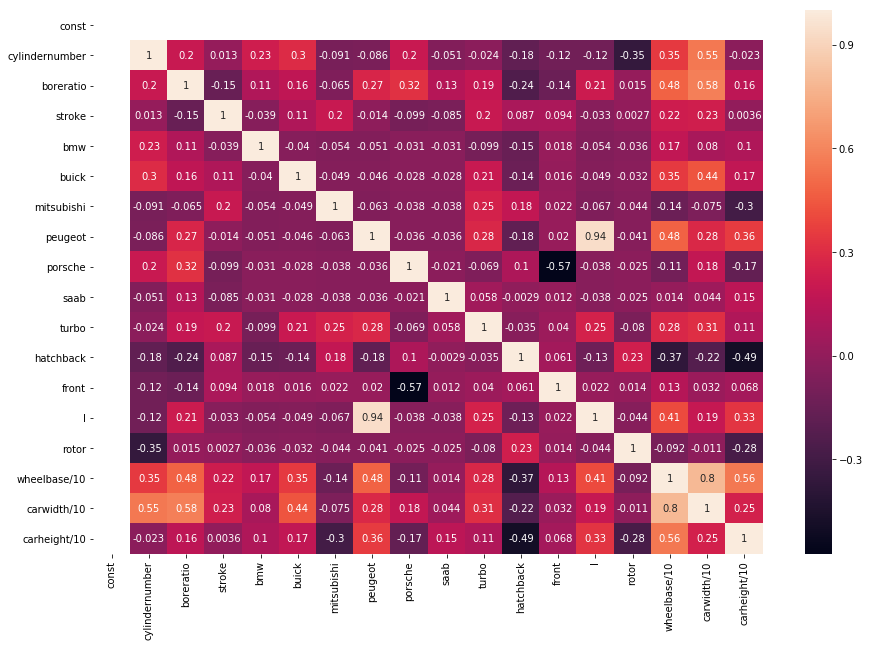

In [164]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train45.corr(),annot=True)

In [169]:
x_train46=x_train45.drop('peugeot',axis='columns')
model46=sm.OLS(y_train,x_train46)
model_mlr_46=model46.fit()
model_mlr_46.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     69.94
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.22e-54
Time:                        15:37:12   Log-Likelihood:                -332.49
No. Observations:                 143   AIC:                             699.0
Df Residuals:                     126   BIC:                             749.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -64.1350     12.273     -5.226      0.000     -88.423     -39.848
cylindernumber     2.3598      0.329      7.170      0.000       1.708       3.011
boreratio          3.0146      1.273      2.367      0.019       0.494       5.535
stroke             2.1893      0.852      2.568      0.011       0.502       3.876
bmw                9.9979      1.206      8.293      0.000       7.612      12.384
buick              5.6868      1.408      4.038      0.000       2.900       8.474
mitsubishi        -2.7506      1.037     -2.652      0.009      -4.803      -0.698
porsche            4.9572      2.299      2.157      0.033       0.408       9.506
saab               3.8519      1.627      2.367      0.019       0.632       7.072
turbo              2.0265      0.683      2.966      0.004       0.674       3.379
hatchback         -1.2069      0.575     -2.100      0.038      -2.344      -0.070
front            -14.5586      3.436     -4.237      0.000     -21.358      -7.759
l                 -0.5034      1.127     -0.447      0.656      -2.733       1.727
rotor              6.7038      1.746      3.839      0.000       3.248      10.160
wheelbase/10       2.2705      0.946      2.400      0.018       0.398       4.143
carwidth/10        9.8940      2.690      3.678      0.000       4.571      15.217
carheight/10      -4.4979      1.494     -3.011      0.003      -7.454      -1.541
==============================================================================
Omnibus:                       50.992   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.511
Skew:                           1.464   Prob(JB):                     3.38e-28
Kurtosis:                       6.558   Cond. No.                         826.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
vif46=pd.DataFrame()
vif46['Features']=x_train46.columns
vif46['VIF']=[variance_inflation_factor(x_train46.values,i) for i in range (x_train46.shape[1])]
vif46['VIF']=round(vif46['VIF'],2)
vif46=vif46.sort_values(by='VIF',ascending=False)
vif46



,Features,VIF
0,const,3098.65
15,carwidth/10,7.25
14,wheelbase/10,6.50
1,cylindernumber,2.97
16,carheight/10,2.70
2,boreratio,2.26
7,porsche,2.23
13,rotor,1.71
11,front,1.69
12,l,1.54


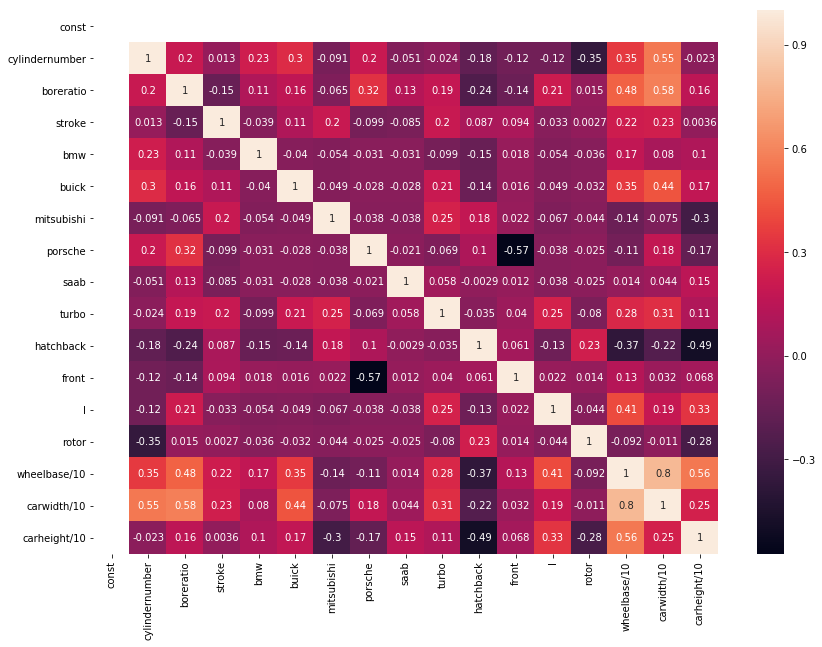

In [172]:
plt.figure(figsize=(14,10))
sns.heatmap(x_train46.corr(),annot=True)

# 48.Drop 'l'(0.656(p val.),1.54(vif)):

In [173]:
x_train47=x_train46.drop('l',axis='columns')
model47=sm.OLS(y_train,x_train47)
model_mlr_47=model47.fit()
model_mlr_47.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     75.07
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.52e-55
Time:                        15:40:17   Log-Likelihood:                -332.60
No. Observations:                 143   AIC:                             697.2
Df Residuals:                     127   BIC:                             744.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -63.6656     12.189     -5.223      0.000     -87.786     -39.546
cylindernumber     2.3819      0.324      7.342      0.000       1.740       3.024
boreratio          3.0150      1.269      2.375      0.019       0.503       5.527
stroke             2.2532      0.838      2.690      0.008       0.596       3.911
bmw               10.0632      1.193      8.436      0.000       7.703      12.424
buick              5.8055      1.379      4.211      0.000       3.077       8.534
mitsubishi        -2.7366      1.033     -2.648      0.009      -4.781      -0.692
porsche            4.8858      2.286      2.137      0.034       0.363       9.409
saab               3.9282      1.613      2.435      0.016       0.736       7.120
turbo              1.9693      0.669      2.943      0.004       0.645       3.293
hatchback         -1.2249      0.571     -2.143      0.034      -2.356      -0.094
front            -14.5133      3.424     -4.239      0.000     -21.288      -7.739
rotor              6.7434      1.739      3.879      0.000       3.303      10.184
wheelbase/10       2.1238      0.884      2.401      0.018       0.374       3.874
carwidth/10       10.0040      2.670      3.747      0.000       4.720      15.287
carheight/10      -4.5209      1.488     -3.037      0.003      -7.466      -1.576
==============================================================================
Omnibus:                       49.433   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.106
Skew:                           1.426   Prob(JB):                     8.30e-27
Kurtosis:                       6.467   Cond. No.                         824.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
vif47=pd.DataFrame()
vif47['Features']=x_train47.columns
vif47['VIF']=[variance_inflation_factor(x_train47.values,i) for i in range (x_train47.shape[1])]
vif47['VIF']=round(vif47['VIF'],2)
vif47=vif47.sort_values(by='VIF',ascending=False)
vif47




,Features,VIF
0,const,3075.94
14,carwidth/10,7.19
13,wheelbase/10,5.72
1,cylindernumber,2.90
15,carheight/10,2.70
2,boreratio,2.26
7,porsche,2.22
12,rotor,1.70
11,front,1.69
10,hatchback,1.52


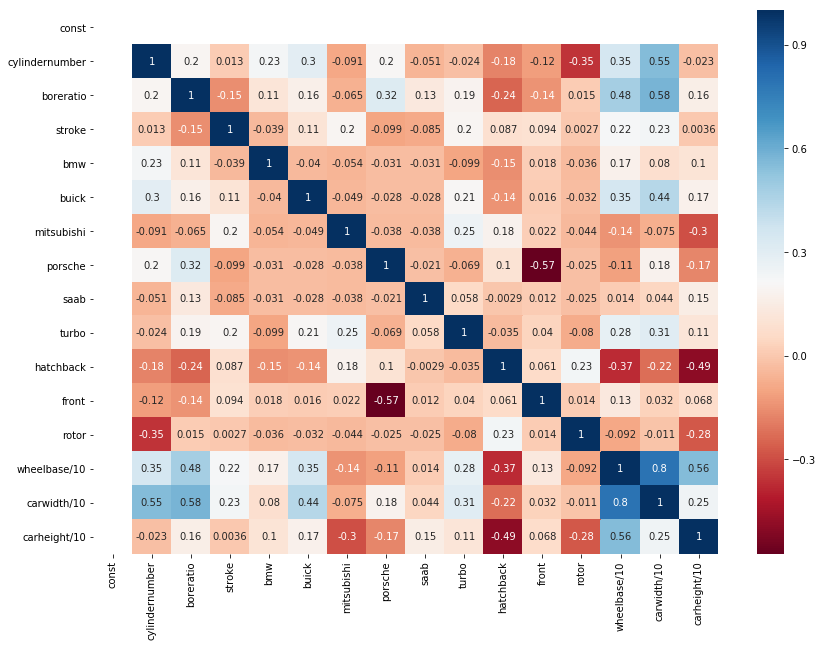

In [176]:
plt.figure(figsize=(14,10))
sns.heatmap(x_train47.corr(),annot=True,cmap='RdBu')

# 49.Drop 'carwidth/10' (0.00(p val.),7.19(vif)):

In [178]:
x_train48=x_train47.drop('carwidth/10',axis='columns')
model48=sm.OLS(y_train,x_train48)
model_mlr_48=model48.fit()
model_mlr_48.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price/1000   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     72.08
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.26e-53
Time:                        15:43:45   Log-Likelihood:                -340.10
No. Observations:                 143   AIC:                             710.2
Df Residuals:                     128   BIC:                             754.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -30.2663      8.727     -3.468      0.001     -47.533     -12.999
cylindernumber     3.0324      0.288     10.542      0.000       2.463       3.602
boreratio          4.6124      1.255      3.675      0.000       2.129       7.096
stroke             3.0385      0.851      3.569      0.001       1.354       4.723
bmw                9.1553      1.226      7.467      0.000       6.729      11.581
buick              6.8723      1.416      4.853      0.000       4.070       9.674
mitsubishi        -2.7317      1.085     -2.518      0.013      -4.878      -0.585
porsche            7.9341      2.242      3.538      0.001       3.497      12.371
saab               4.6383      1.682      2.758      0.007       1.311       7.966
turbo              2.5407      0.684      3.715      0.000       1.188       3.894
hatchback         -1.2416      0.600     -2.070      0.040      -2.429      -0.055
front            -11.1780      3.470     -3.221      0.002     -18.044      -4.312
rotor              8.8598      1.726      5.133      0.000       5.445      12.275
wheelbase/10       4.2043      0.723      5.818      0.000       2.774       5.634
carheight/10      -4.9467      1.558     -3.175      0.002      -8.029      -1.864
==============================================================================
Omnibus:                       38.516   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.064
Skew:                           1.179   Prob(JB):                     1.12e-17
Kurtosis:                       5.747   Cond. No.                         505.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
vif48=pd.DataFrame()
vif48['Features']=x_train48.columns
vif48['VIF']=[variance_inflation_factor(x_train48.values,i) for i in range (x_train48.shape[1])]
vif48['VIF']=round(vif48['VIF'],2)
vif48=vif48.sort_values(by='VIF',ascending=False)
vif48



,Features,VIF
0,const,1430.83
13,wheelbase/10,3.46
14,carheight/10,2.68
1,cylindernumber,2.07
2,boreratio,2.00
7,porsche,1.94
11,front,1.57
10,hatchback,1.52
12,rotor,1.52
3,stroke,1.32


# From model_mlr_48:

## 1. P_ value of all the parameters is less than 0.05 i.e all the listed parameters are significant.

## 2. VIF of all the listed parameters is less than 5 i.e there exist no multicollienarity in the model.

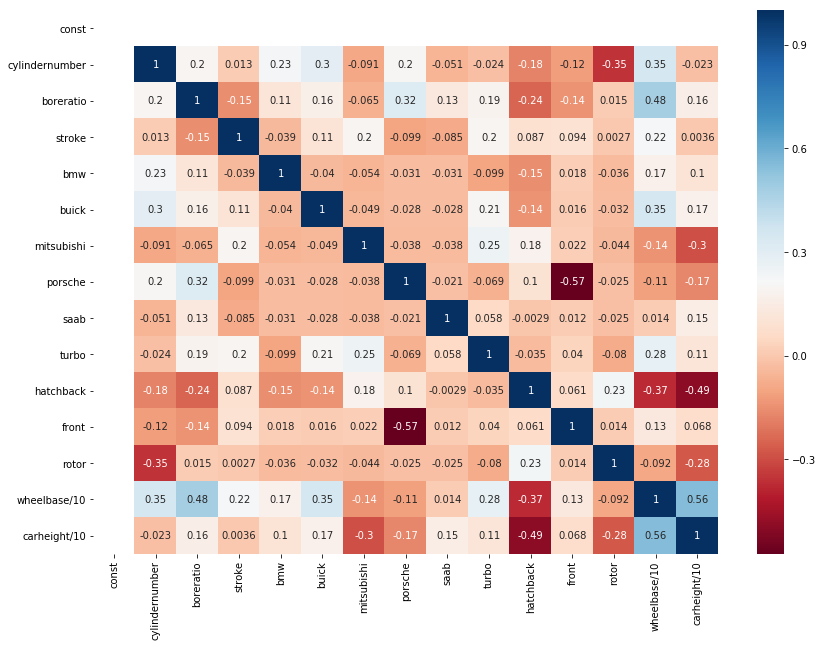

In [180]:
plt.figure(figsize=(14,10))
sns.heatmap(x_train48.corr(),annot=True,cmap='RdBu')

# Residual analysis:

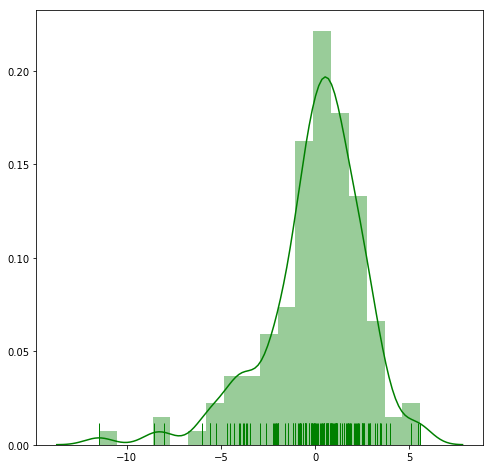

In [185]:
plt.figure(figsize=(8,8))
y_train_pred=model_mlr_48.predict(x_train48)
res=y_train_pred-y_train
sns.distplot(res,rug=True,color='g')

## From Residual analysis:
### 1. Residuals are normally distributed.
### 2. Mean value of residuals is 0

# Prediction and model evaluation:

In [190]:
x_test_sm=sm.add_constant(x_test)
x_test_sm=x_test_sm.drop(['subaru','carwidth/10','l','peugeot','wagon','hardtop','sedan','peakrpm/100','dohcv','2bbl','dodge','plymouth',\
               'ohcf','ohc','volvo','enginesize/10','curbweight/100','honda','highwaympg','chevrolet','compressionratio','gas',\
               'subaru','car_ID','rear','mercury','volkswagen','ohcv','mpfi','spdi','mazda','toyota','jaguar','symboling',\
                'citympg','spfi','rwd','idi','mfi','audi','isuzu','nissan','doornumber','renault','alfa-romero','horsepower/10',\
                '4bbl','carlength/10','fwd'],axis='columns')


In [201]:
# Predict the values for test dataset using the model.
y_test_pred=model_mlr_48.predict(x_test_sm)


In [202]:
# Let's chck the  score of the model to evaluate it's performance.
r2_score(y_test, y_test_pred)

0.814519551440862

# R^2 Value comparison:

### 1. For training dataset (x_train48) adj. r2_score= 0.875

### 2. For test dataset (x_test_sm) adj. r2_score=0.814

## The adj. R^2 score for both training and test dataset is in close proximity of each other. Hence, the model created(model_mlr_48) is an efficient model. 
